# Countng readings
In this notebook we will try to extract  electric meters that have an uniform number of readings during their period analysis

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/3/"

## Reading csv

In [3]:
file_name1 = dir_origen_csv + "Data_limpia_windows.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df["fecha"] =  pd.to_datetime(df["fecha"]) #transforming "fecha" to datetime
df.head()

medidor               fecha  lectura_id_orig  voltajeA  voltajeB  \
0  15029828 2019-04-04 01:00:58          1141410  117.4806  117.7270   
1  15029828 2019-04-04 03:00:58          1141840  117.3321  117.5873   
2  15029828 2019-04-04 05:00:58          1142271  118.3265  118.3270   
3  15029828 2019-04-04 07:01:01          1142711  119.8214  119.9720   
4  15029828 2019-04-04 09:01:02          1143130  114.6726  114.8017   

   voltajeC  corrienteA  corrienteB  corrienteC modelo  ...  Longitud  \
0  117.3373      2.5937      0.4362      1.2456     A3  ...  -79.4001   
1  117.6078      2.5860      0.4373      1.2439     A3  ...  -79.4001   
2  118.5901      2.6232      0.4349      1.2502     A3  ...  -79.4001   
3  119.6614      2.6989      0.4356      1.2671     A3  ...  -79.4001   
4  115.2943      2.0728      0.8169      0.9463     A3  ...  -79.4001   

   CLASIFICACION  kwh_consumido  kvarh_consumido  tipo_consumo  \
0       PILADORA        23.2575              0.0         medio   
1       PILADORA        22.6800              0.0         medio   
2       PILADORA        23.5200              0.0         medio   
3       PILADORA        20.2125              0.0         medio   
4       PILADORA        26.4075              0.0         medio   

   clasificacion_encoded  modelo_encoded  tipo_consumo_encoded   kwh_hora  \
0                      3               0                     0  11.628750   
1                      3               0                     0  11.340000   
2                      3               0                     0  11.760000   
3                      3               0                     0  10.102041   
4                      3               0                     0  13.201916   

   dayMonth  
0        14  
1        14  
2        14  
3        14  
4        14  

[5 rows x 35 columns]

## General counting

### Number of meters

In [4]:
df["medidor"].nunique()

112

### Number of readings per meter

In [5]:
df["medidor"].value_counts()

58706656    2947
52073163    1392
15029977     736
15029846     726
20037228     722
58706706     721
15029835     719
15842894     718
16951216     716
16951175     715
16951221     714
16567743     713
16951176     713
16951203     712
15842885     711
16951181     711
16567753     710
16951209     710
15029844     710
16951220     708
16951205     706
16951201     703
16567760     701
20037214     701
15029847     701
16567746     700
16951206     699
16567761     699
16951222     698
16951177     697
            ... 
53307830     360
59814806     360
52071420     360
58706663     359
35924882     358
52073359     357
52071428     356
52073331     356
35924864     356
58706634     355
41175730     355
52073348     348
35947180     346
28006904     346
53307871     344
52071447     342
52073201     341
58706740     339
58706704     333
52073382     332
35924866     331
35925291     331
52073290     327
58706662     315
52073198     312
58706713     286
52071455     275
58706709     2

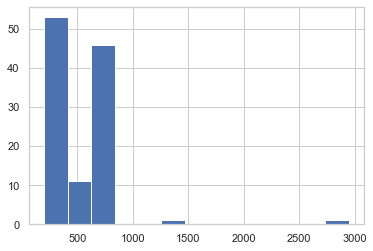

In [6]:
plt.figure()
df["medidor"].value_counts().hist(bins = 13)

### Histogram #Readings per day of Month (0 -> 30)
(be careful if is there are more than one month in your dataset)

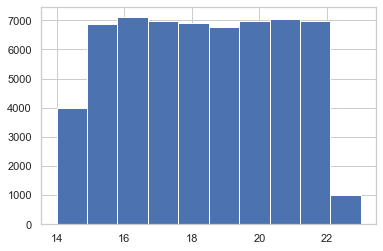

In [7]:
df["dayMonth"].hist()

## Generating graphs of variance and std of all meters acording to the numer of readings in each day 

In [13]:
var_dict = {}
std_dict = {}
for n, g in df.groupby("medidor"):
    #g["fecha"] = pd.to_datetime(g["fecha"])
    g.set_index("fecha", inplace = True)
    g = g.resample("D").count()
    variance = g["voltajeA"].var()
    std = g["voltajeA"].std()
    var_dict[n] = variance
    std_dict[n] = std

    

In [14]:
s1 = pd.Series(var_dict)
s2 = pd.Series(std_dict)

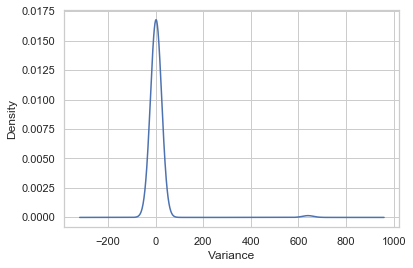

In [15]:
fig = plt.figure()
s1.plot.kde()
plt.xlabel("Variance")
plt.savefig(dir_export + "Densidad_var_numero_dias_windows.jpg")

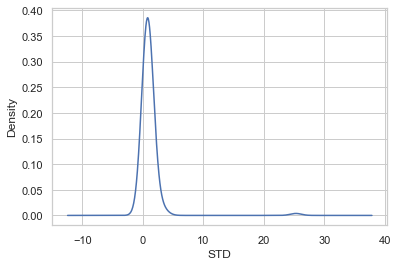

In [16]:
fig = plt.figure()
s2.plot.kde()
plt.xlabel("STD")
plt.savefig(dir_export + "Densidad_std_numero_dias_windows.jpg")

In [17]:
n = (s2 - s2.min()) / (s2.max() - s2.min())

In [18]:
quantil = n.quantile(0.35)
(n[n<quantil])

15029835    0.016813
15029846    0.017511
28006904    0.017530
28877074    0.013395
35924863    0.011810
35924864    0.016891
35924882    0.011887
35925134    0.008340
35925294    0.008340
35925308    0.007477
35925506    0.013113
35946575    0.015388
35947190    0.020551
41175730    0.020568
52071420    0.008875
52071428    0.018058
52071447    0.020331
52073194    0.010287
52073196    0.005171
52073200    0.009421
52073218    0.003576
52073240    0.009946
52073292    0.012633
52073295    0.012486
52073302    0.007408
52073321    0.017701
52073331    0.016891
52073345    0.009181
52073348    0.017087
52073352    0.000000
53307830    0.010647
53307859    0.011912
58706632    0.010287
58706655    0.006364
58706659    0.012633
58706663    0.014239
58706706    0.017281
58706725    0.020568
59814806    0.010647
dtype: float64

## Individual graphs

### Number of readings per day of Month

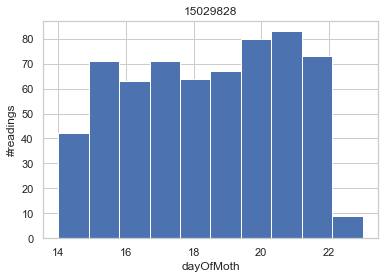

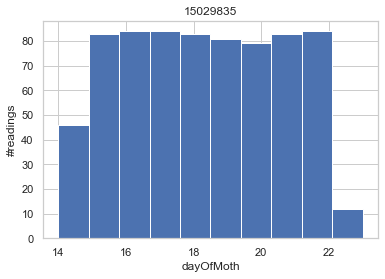

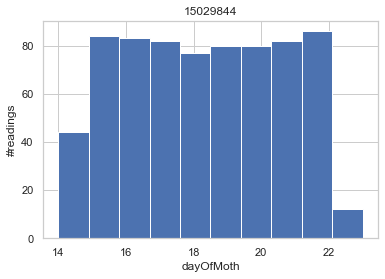

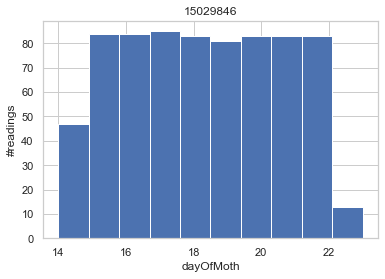

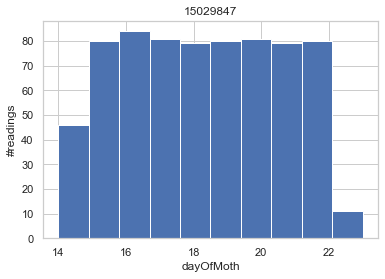

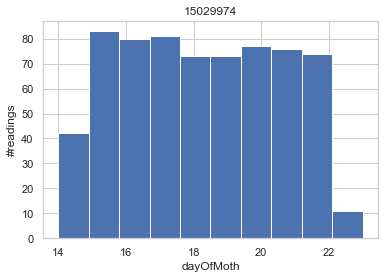

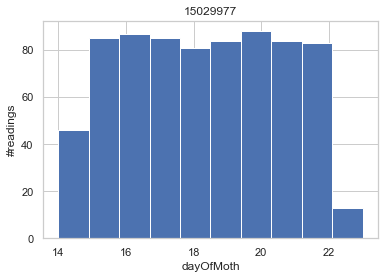

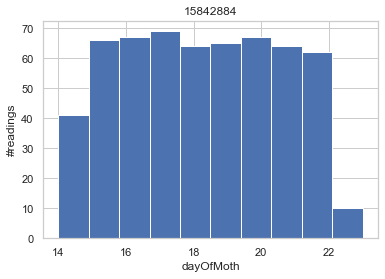

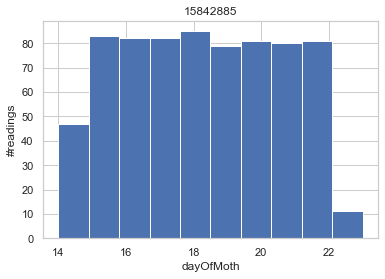

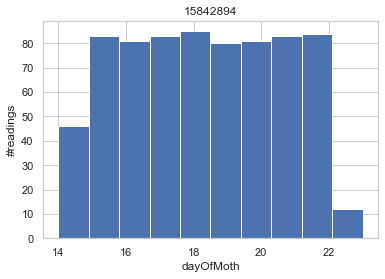

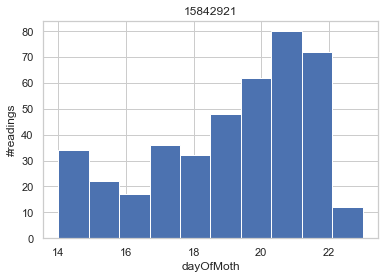

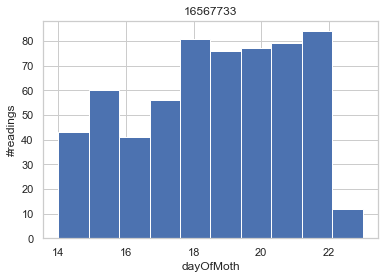

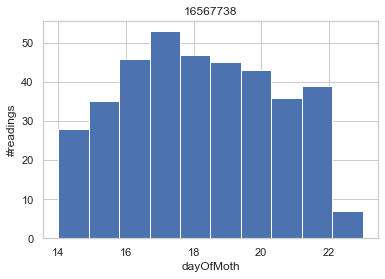

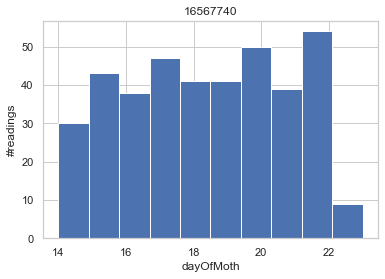

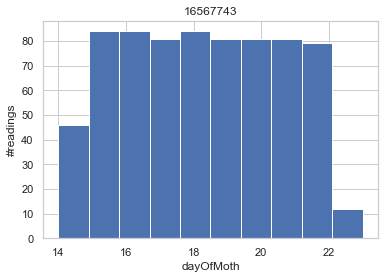

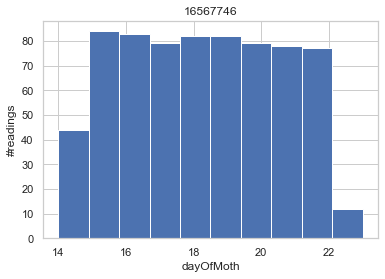

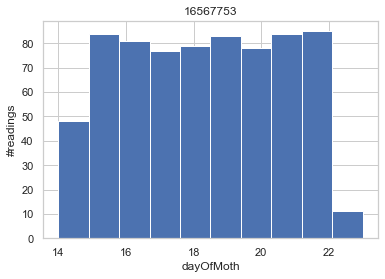

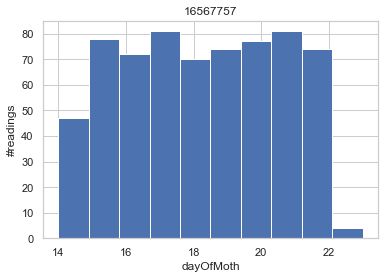

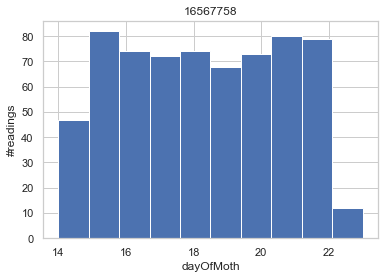

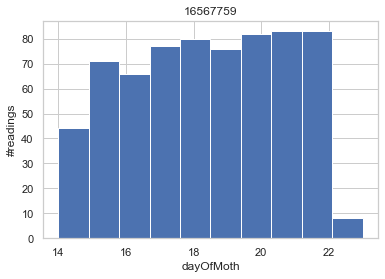

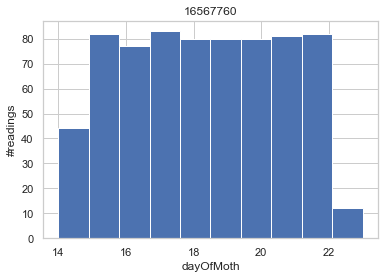

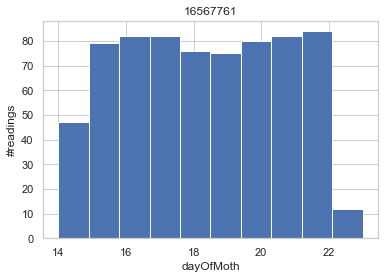

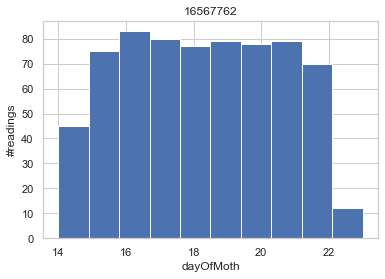

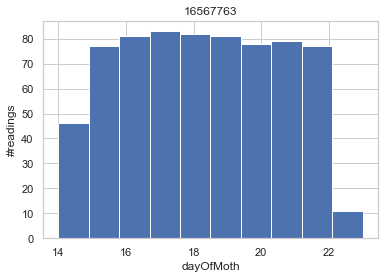

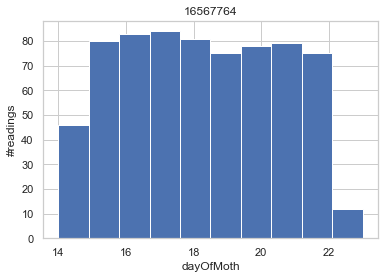

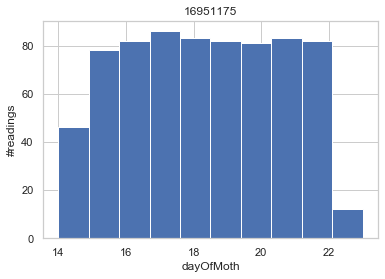

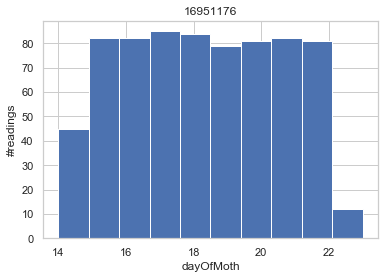

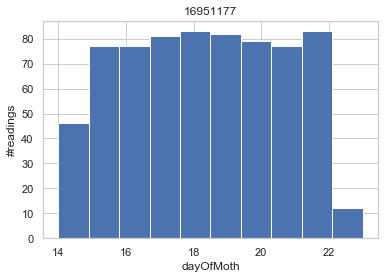

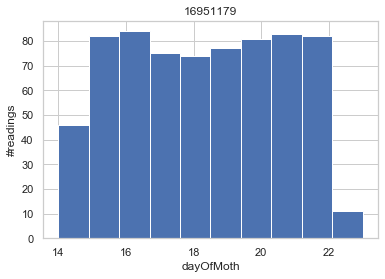

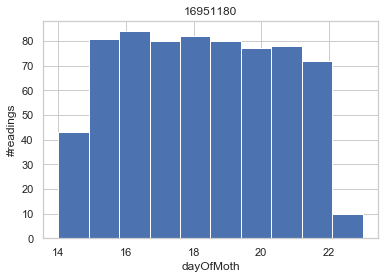

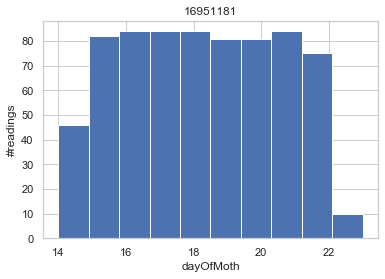

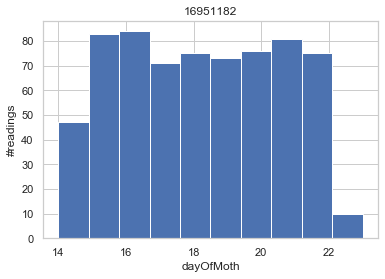

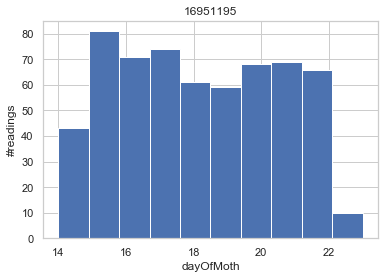

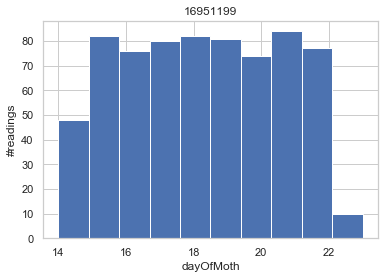

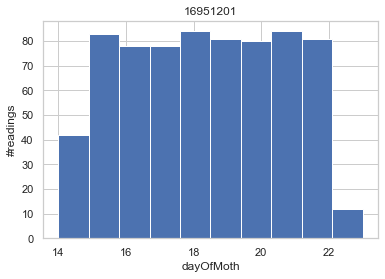

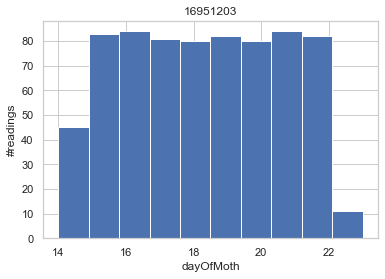

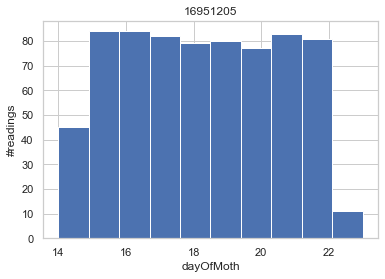

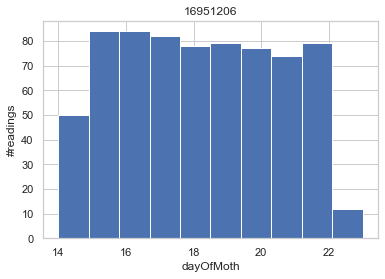

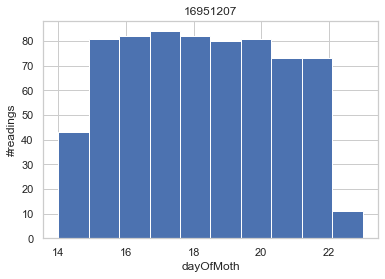

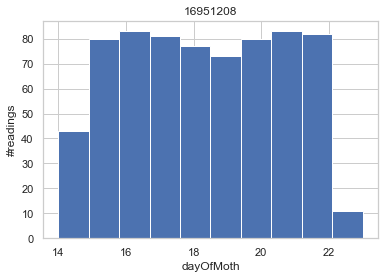

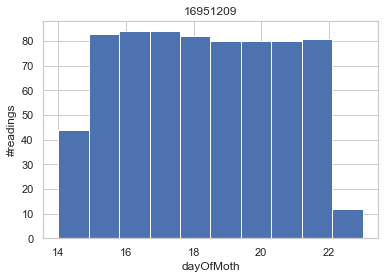

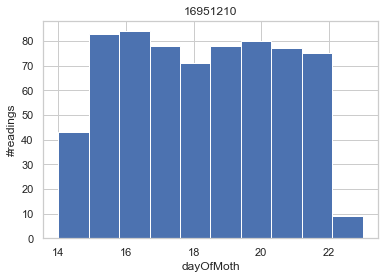

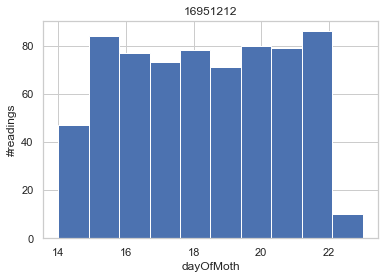

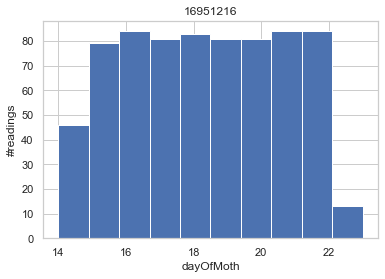

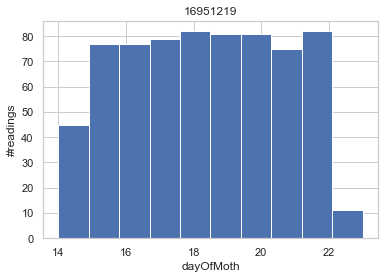

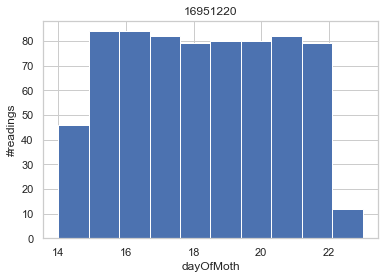

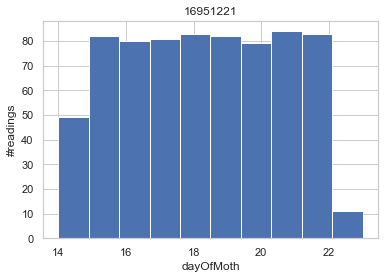

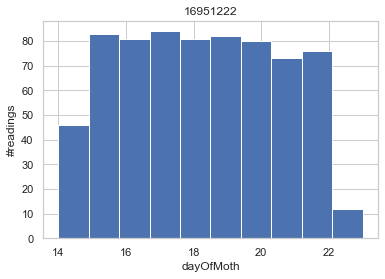

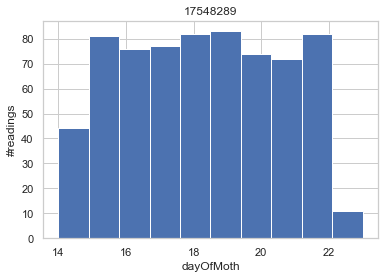

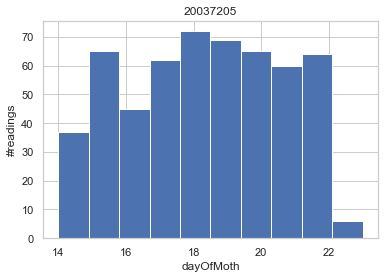

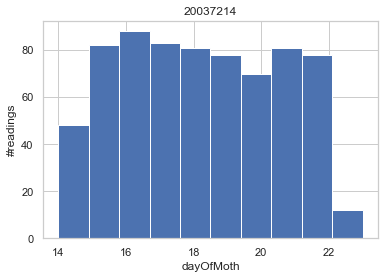

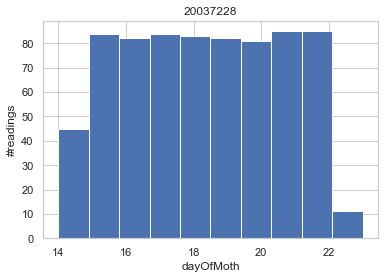

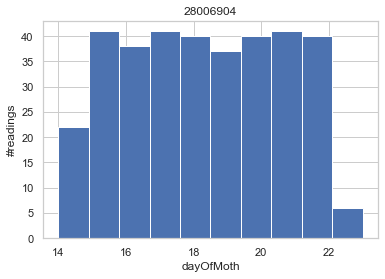

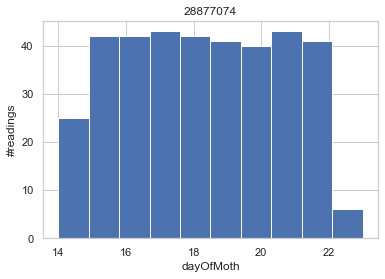

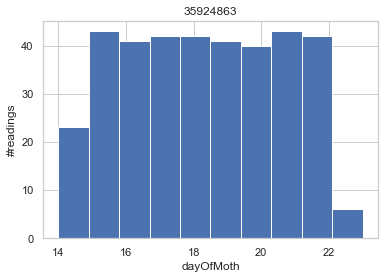

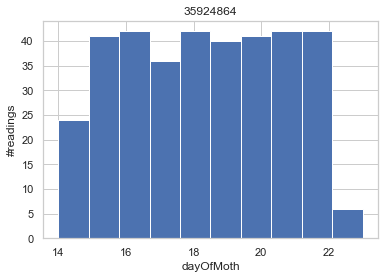

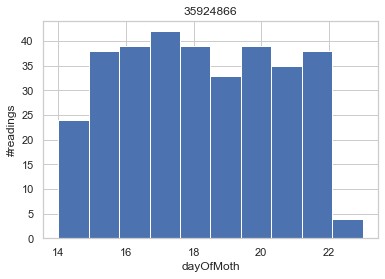

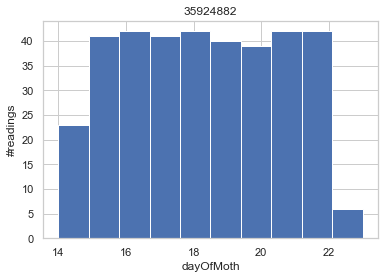

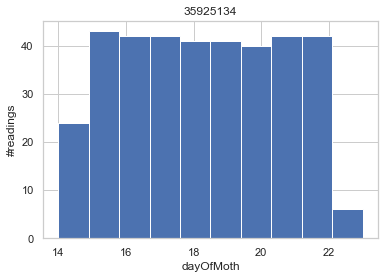

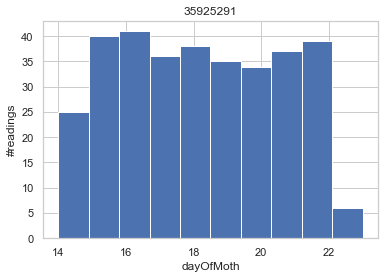

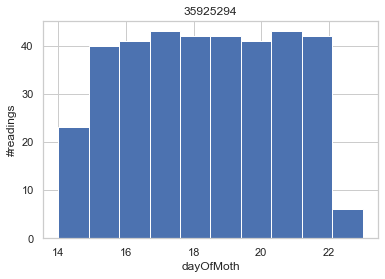

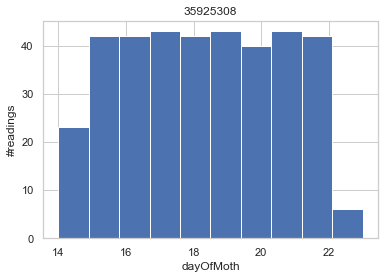

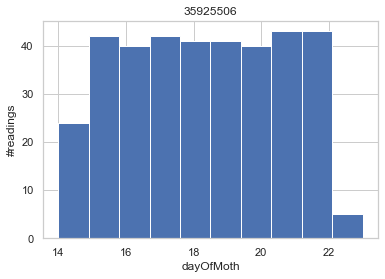

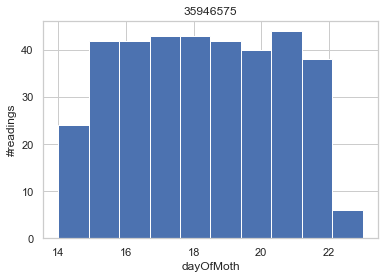

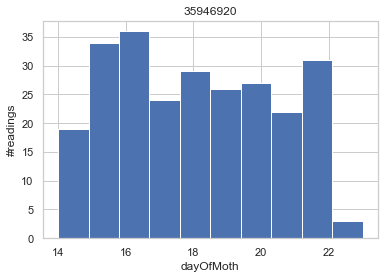

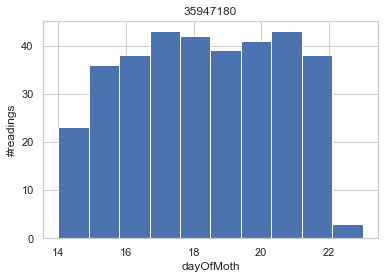

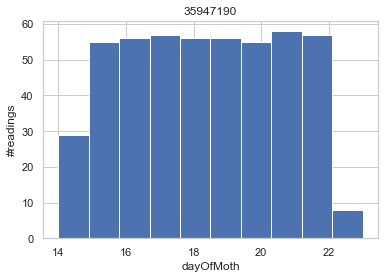

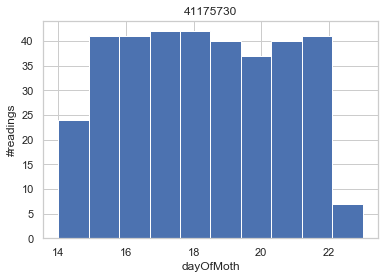

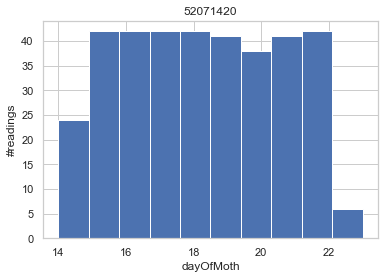

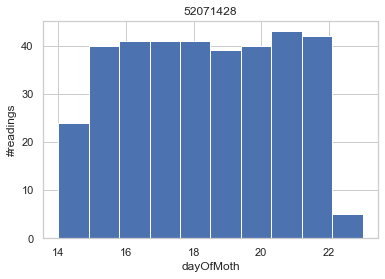

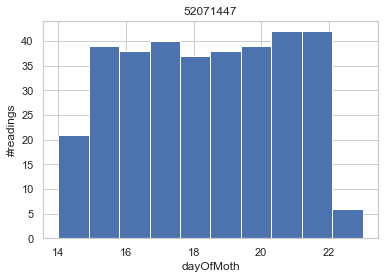

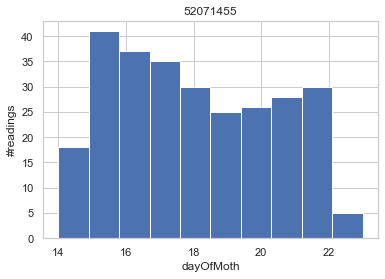

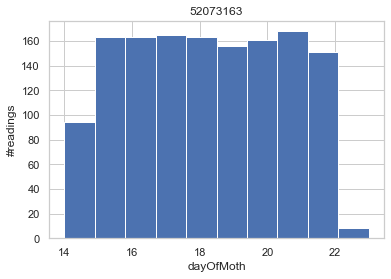

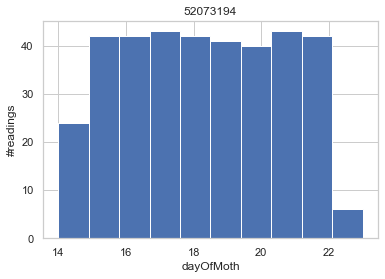

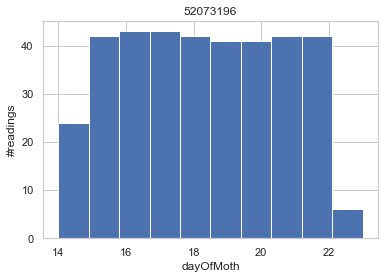

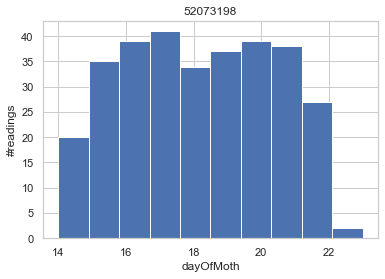

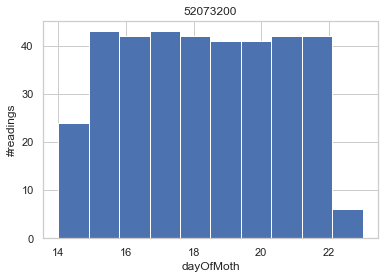

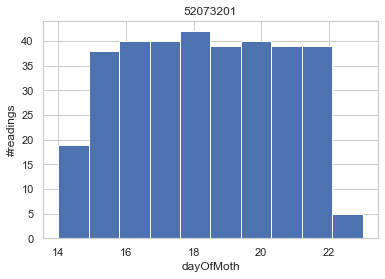

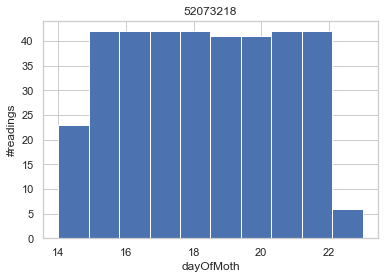

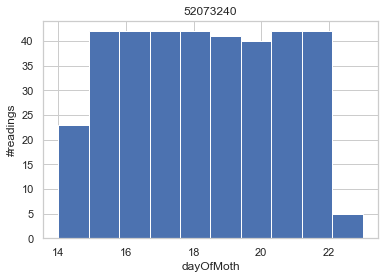

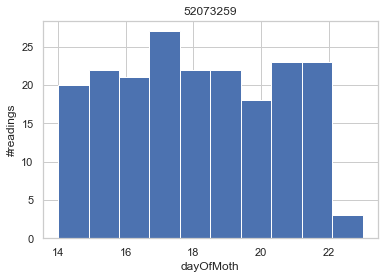

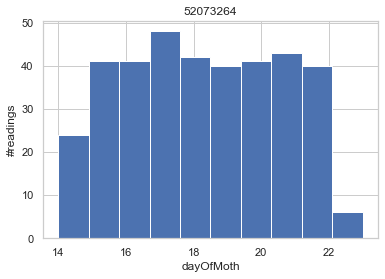

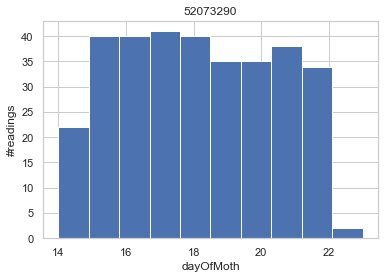

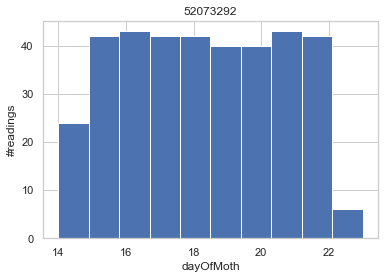

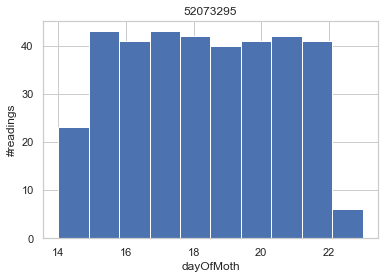

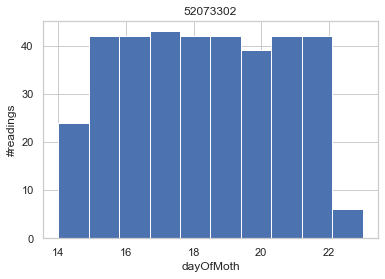

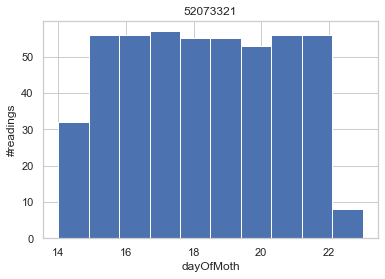

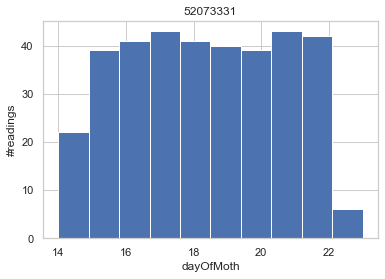

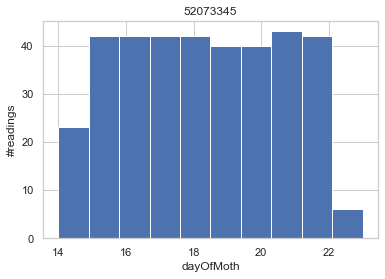

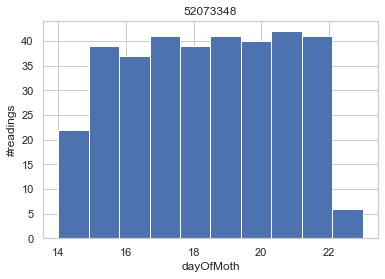

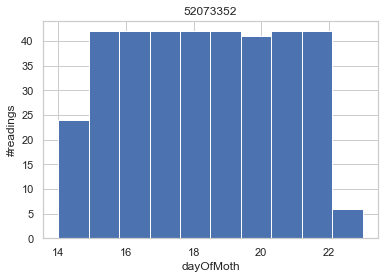

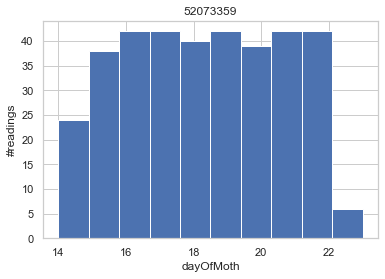

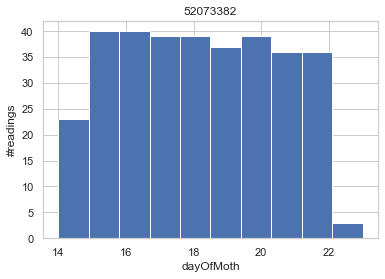

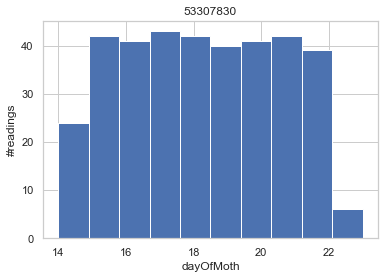

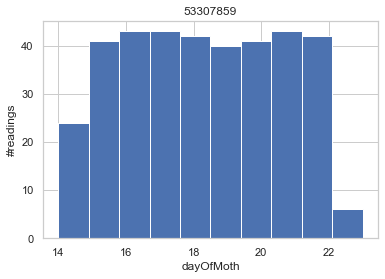

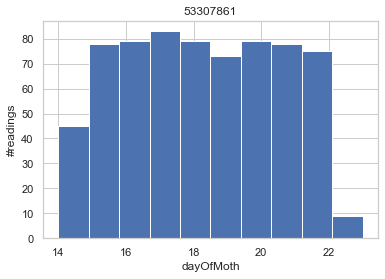

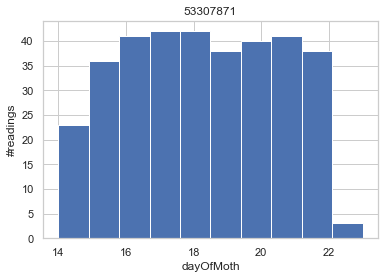

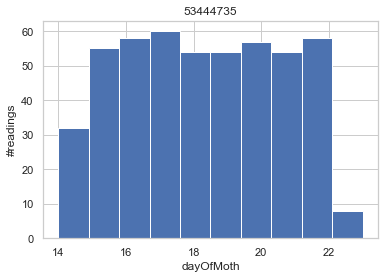

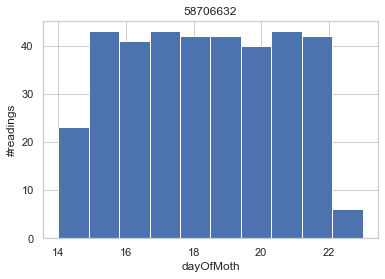

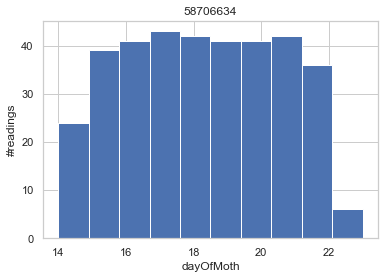

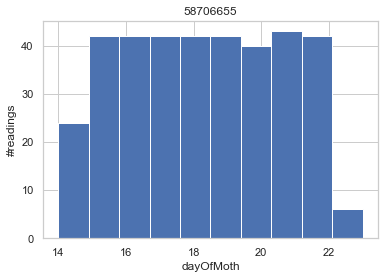

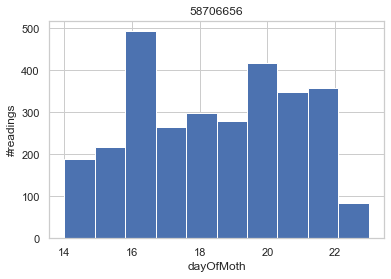

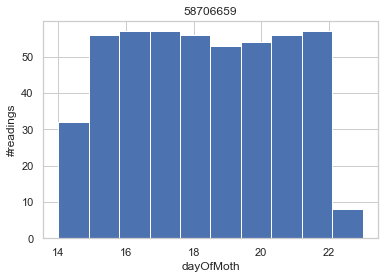

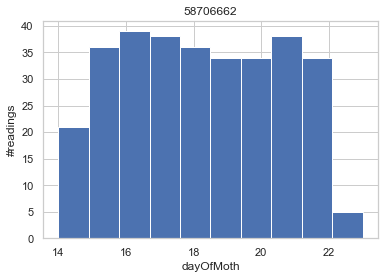

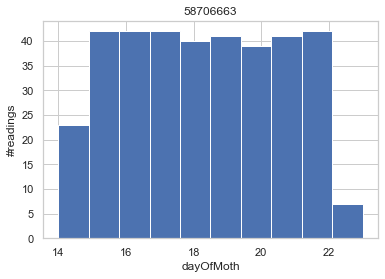

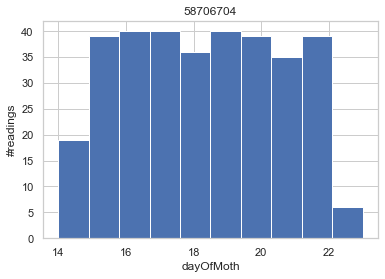

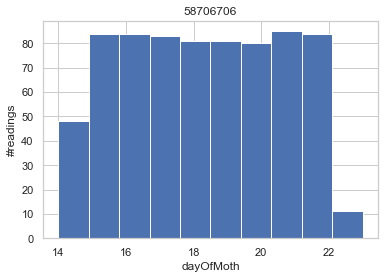

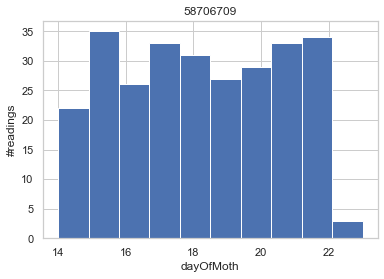

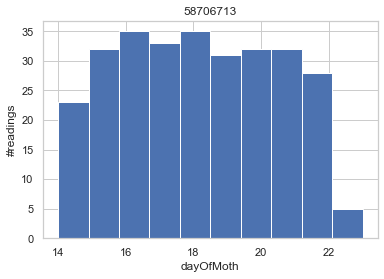

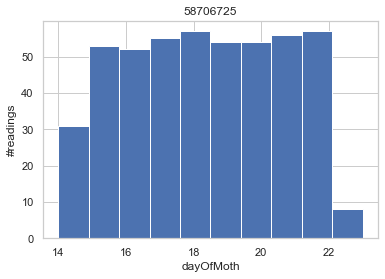

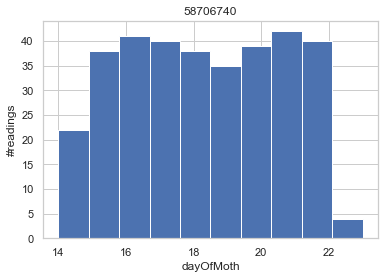

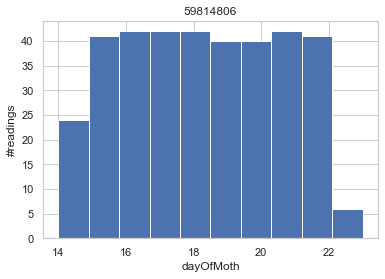

In [8]:

with PdfPages(dir_export + "Number of readings per day of Month _windows.pdf") as pdf:

    for n,g in df.groupby("medidor")["dayMonth"]:
        fig = plt.figure()
        plt.title(n)
        plt.xlabel("dayOfMoth")
        plt.ylabel("#readings")
        g.hist()
        pdf.savefig(fig)

In [9]:
'''
def unique(df):
    a_month =df["fecha"].apply(lambda x: x.day)
    a_month =df["fecha"].apply(lambda x: x.month)

    b = df["fecha"].shift()
    b_day = b.apply(lambda x: x.day)
    b_month = b.apply(lambda x: x.month)
    diff = ((a_month != b_month) | (a_month != b_day))     
    count = -1
    before = 0
    serie = []
    for i in diff:
        if (count == -1):
            before = i
            count +=1
        else:
            if (i != before):
                count += 1
            before = i
            serie.append(count)
    dataframe = pd.DataFrame(serie)
    return dataframe

for n,g in df.groupby("medidor"):
    reading_per_day = unique(df)
    figure = plt.figure()
    reading_per_day.hist()
'''

'\ndef unique(df):\n    a_month =df["fecha"].apply(lambda x: x.day)\n    a_month =df["fecha"].apply(lambda x: x.month)\n\n    b = df["fecha"].shift()\n    b_day = b.apply(lambda x: x.day)\n    b_month = b.apply(lambda x: x.month)\n    diff = ((a_month != b_month) | (a_month != b_day))     \n    count = -1\n    before = 0\n    serie = []\n    for i in diff:\n        if (count == -1):\n            before = i\n            count +=1\n        else:\n            if (i != before):\n                count += 1\n            before = i\n            serie.append(count)\n    dataframe = pd.DataFrame(serie)\n    return dataframe\n\nfor n,g in df.groupby("medidor"):\n    reading_per_day = unique(df)\n    figure = plt.figure()\n    reading_per_day.hist()\n'

### Frequency number of readings: barplot

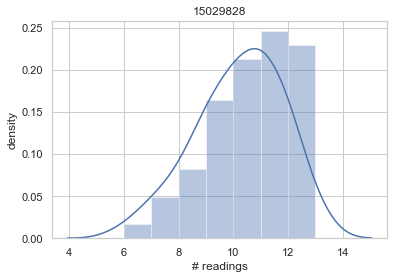

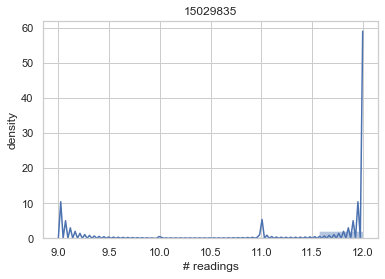

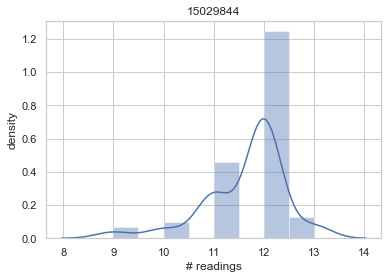

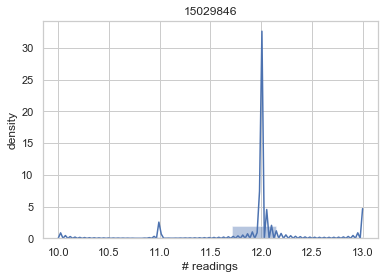

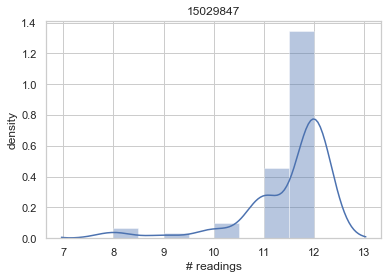

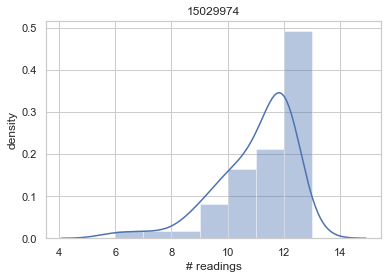

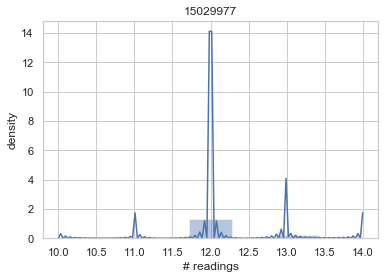

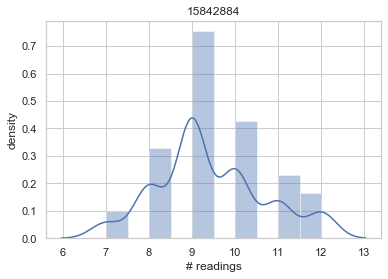

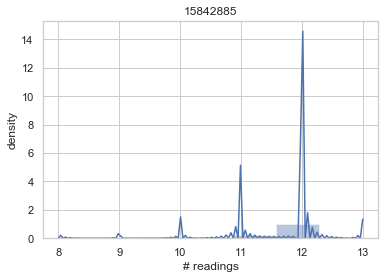

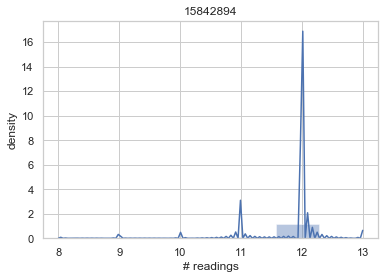

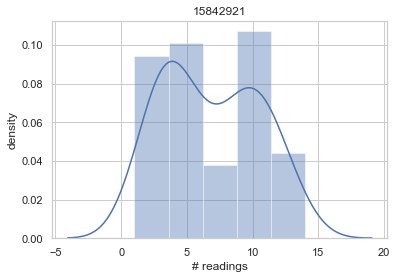

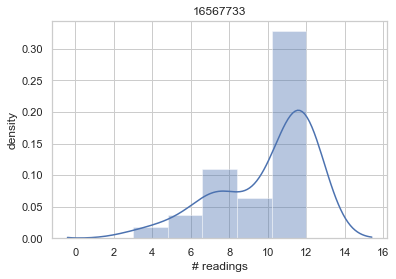

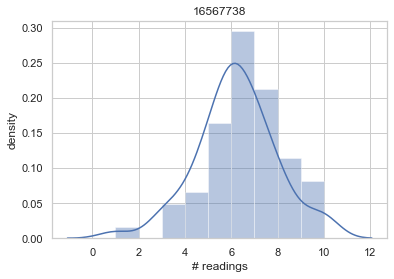

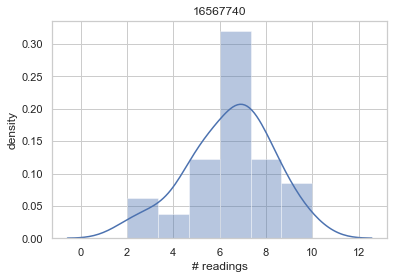

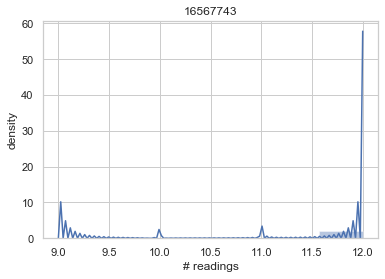

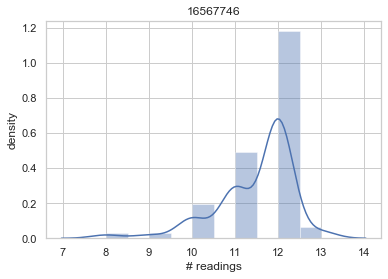

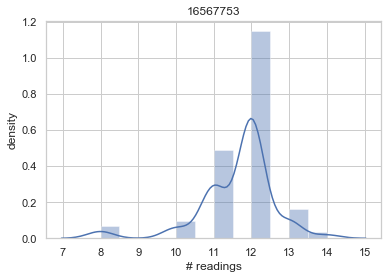

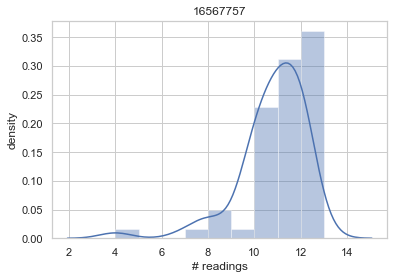

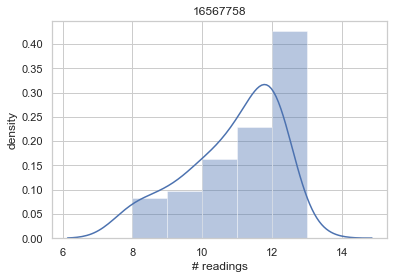

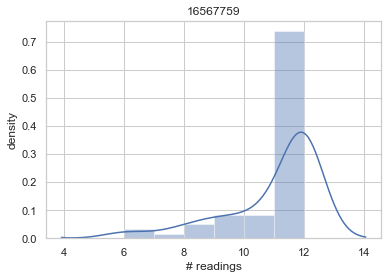

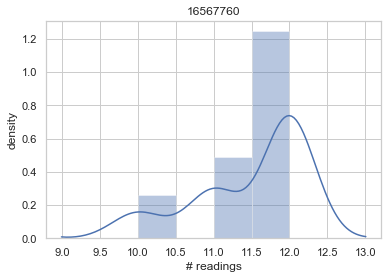

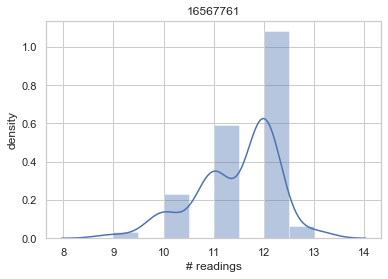

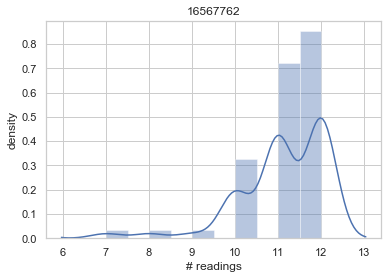

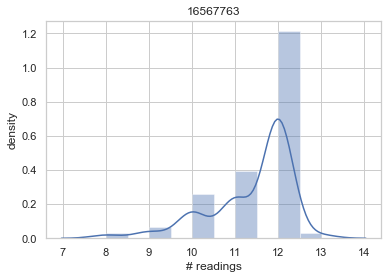

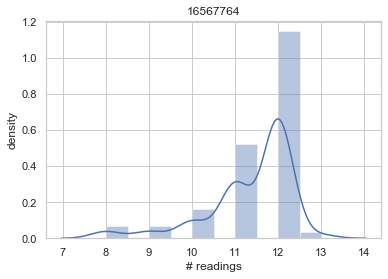

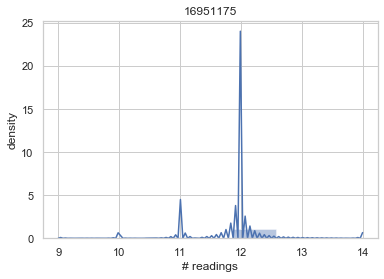

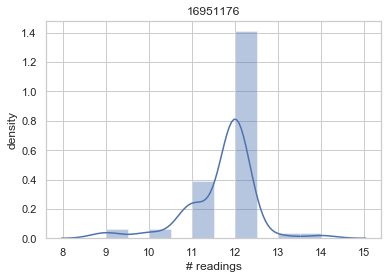

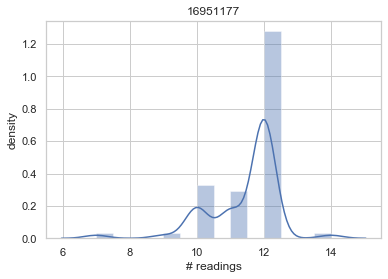

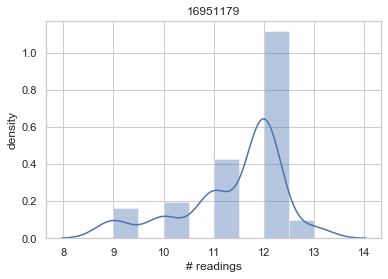

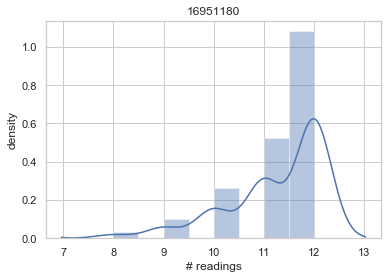

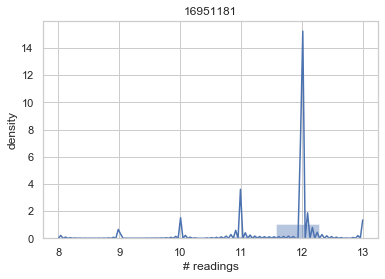

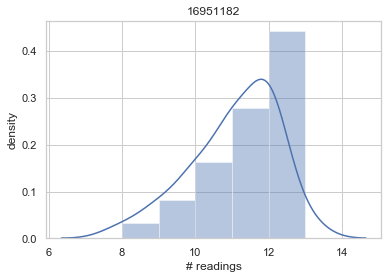

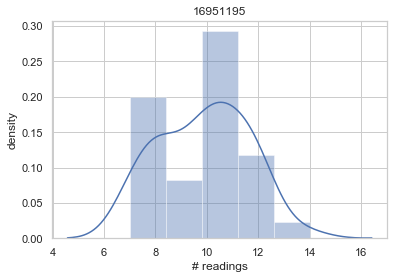

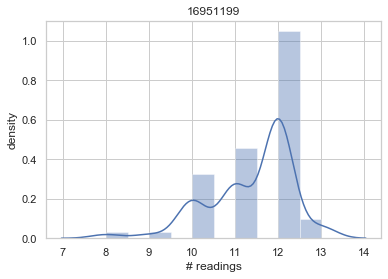

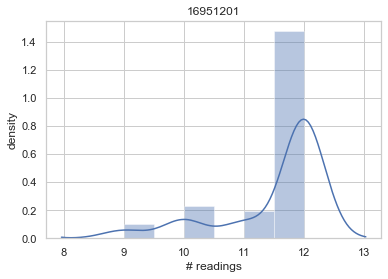

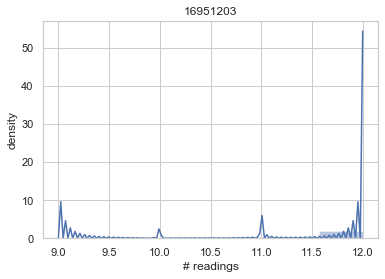

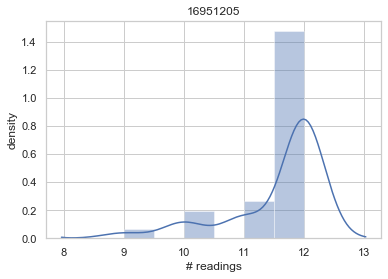

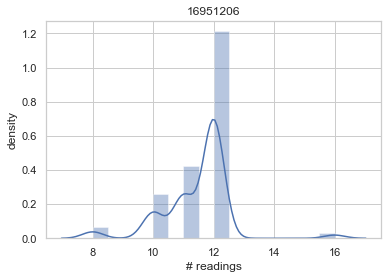

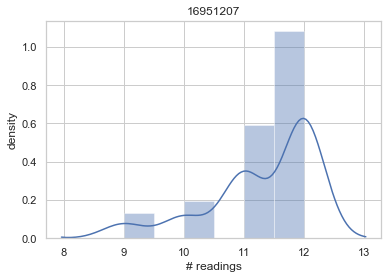

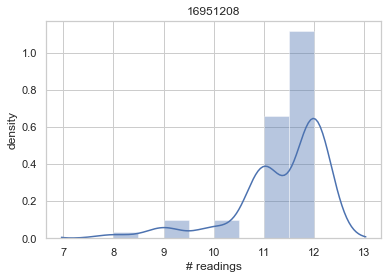

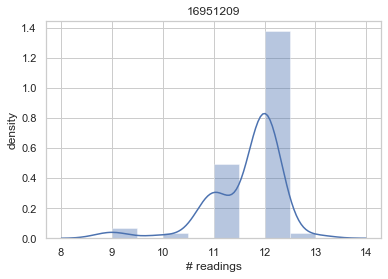

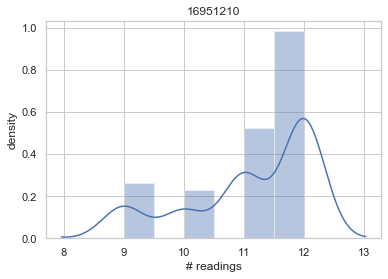

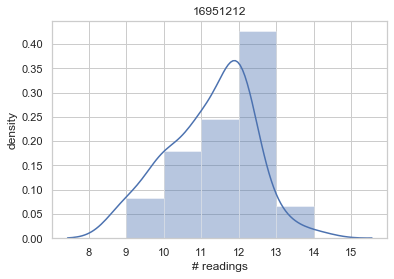

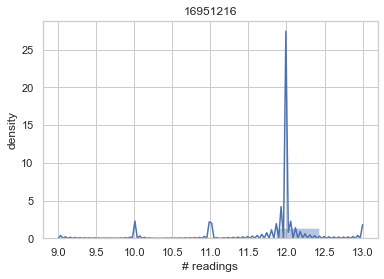

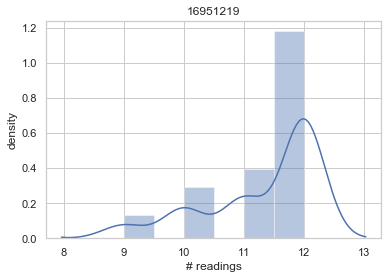

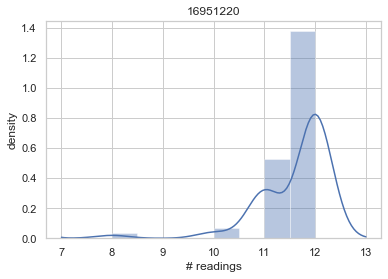

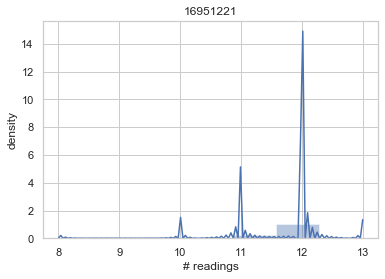

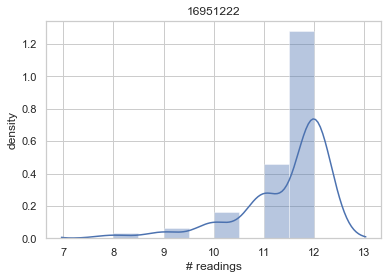

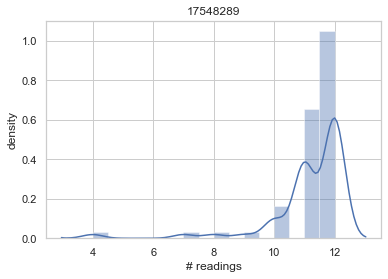

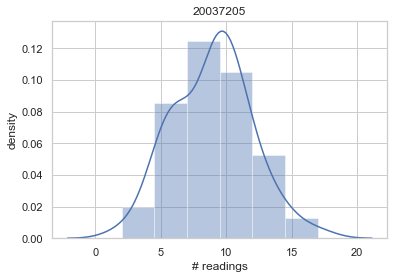

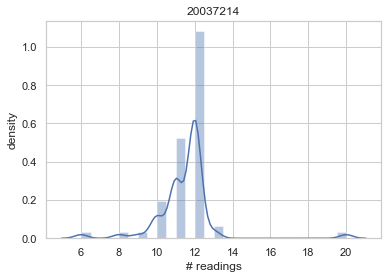

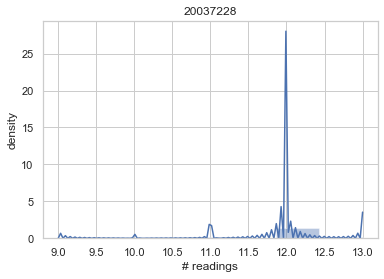

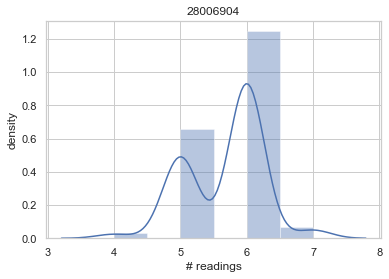

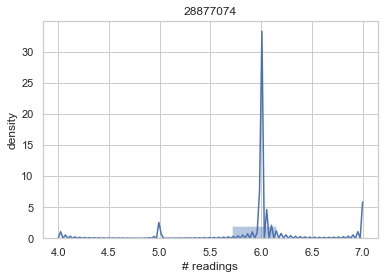

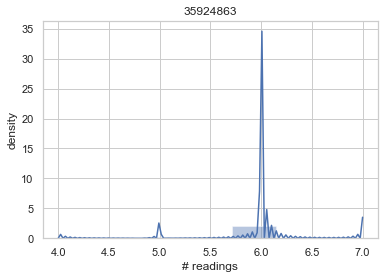

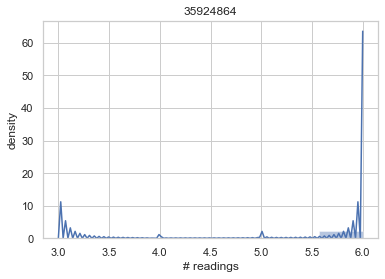

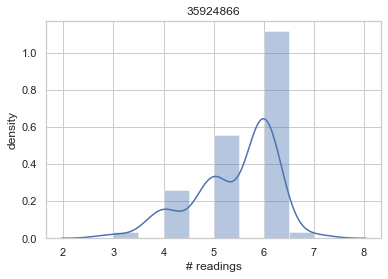

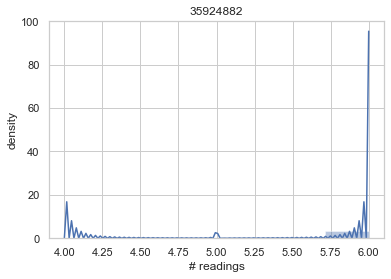

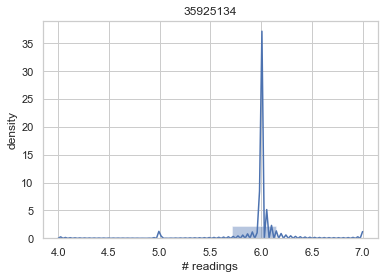

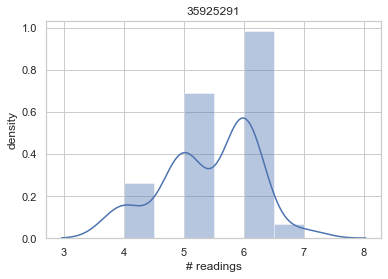

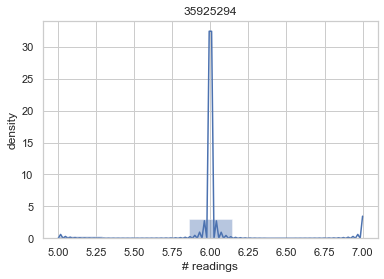

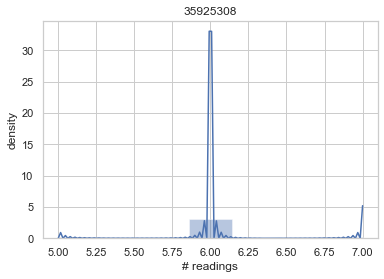

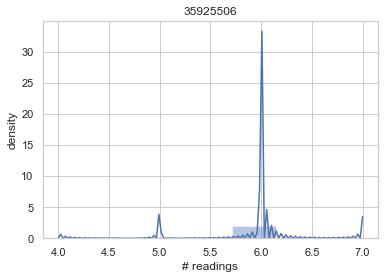

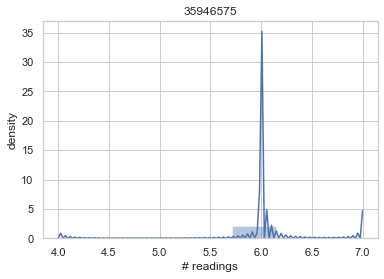

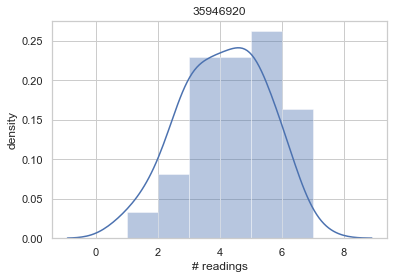

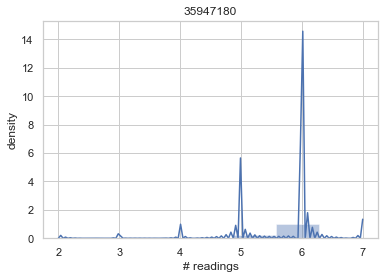

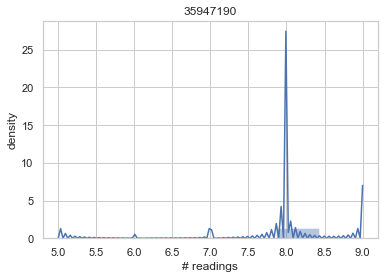

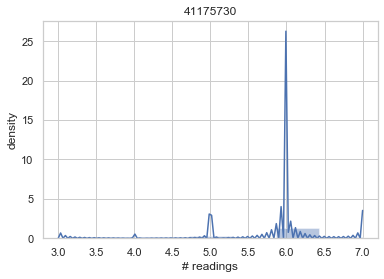

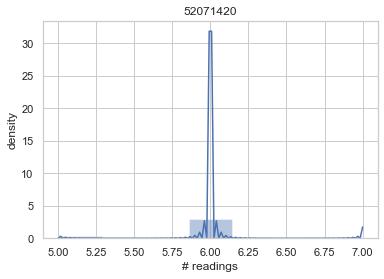

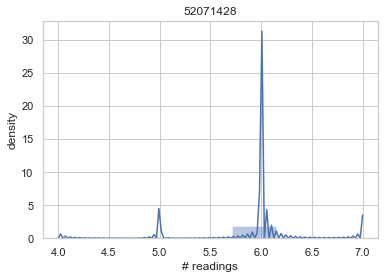

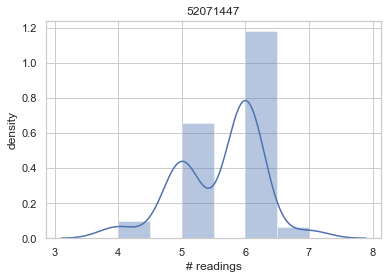

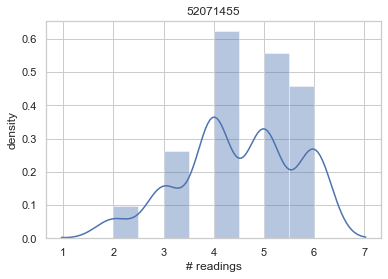

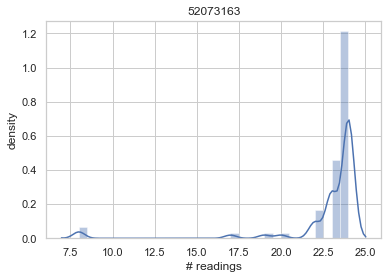

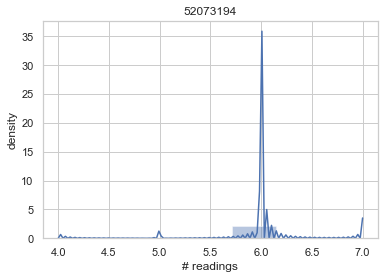

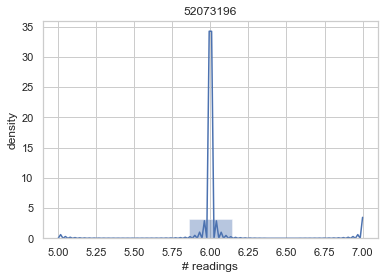

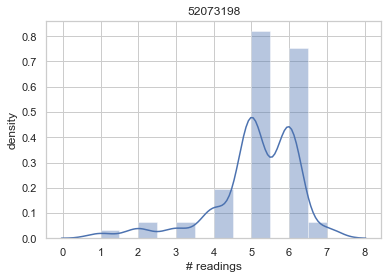

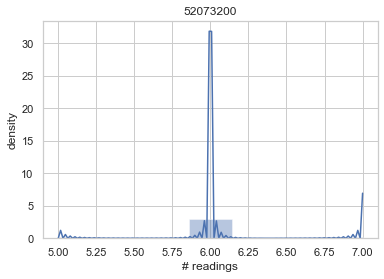

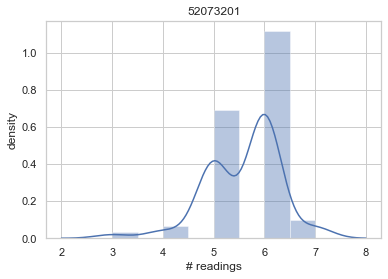

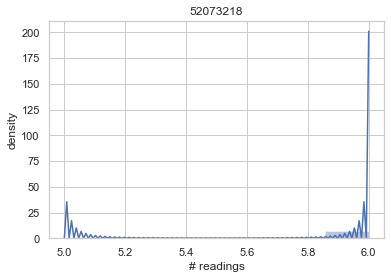

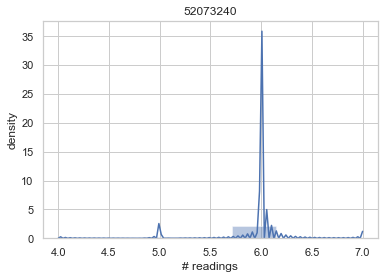

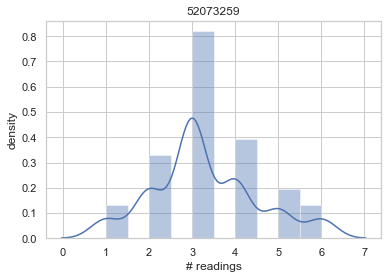

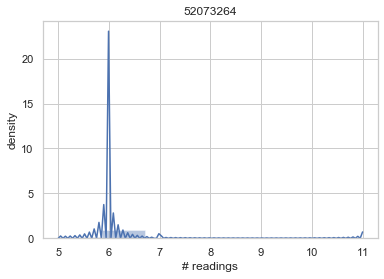

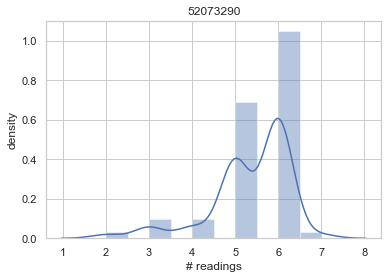

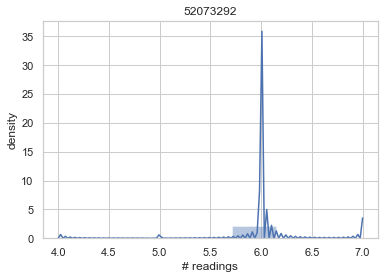

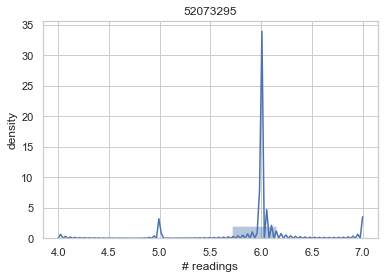

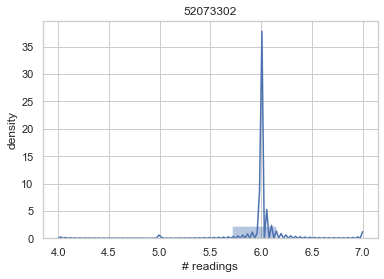

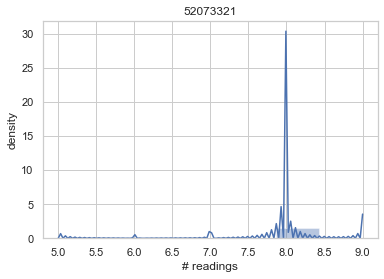

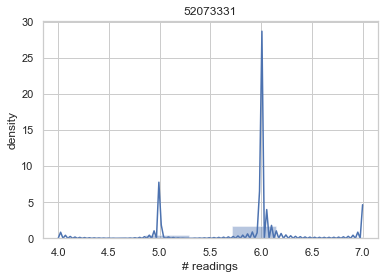

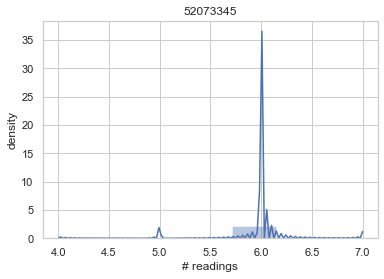

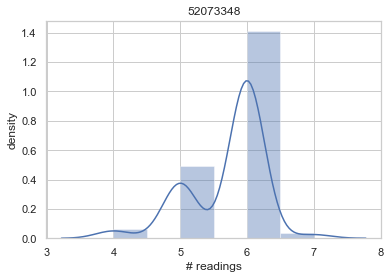

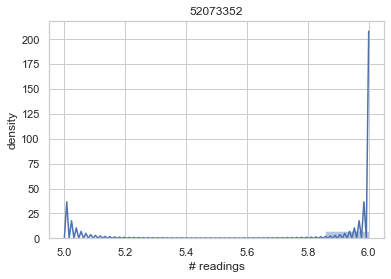

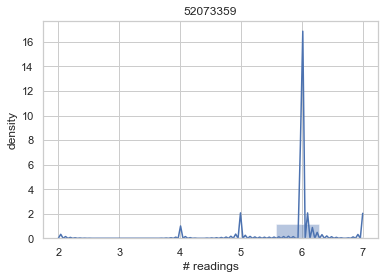

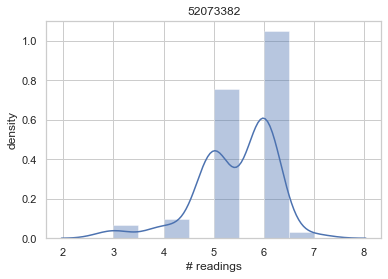

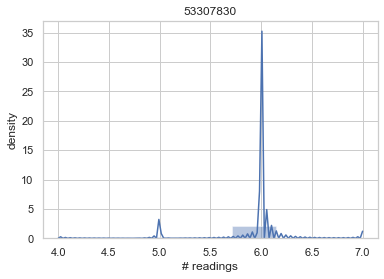

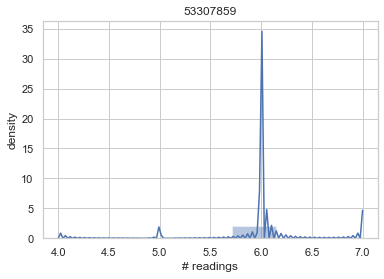

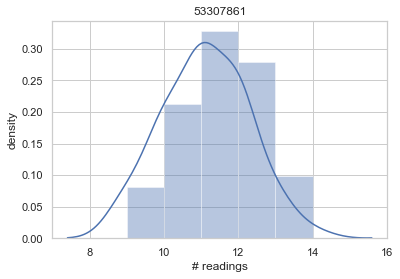

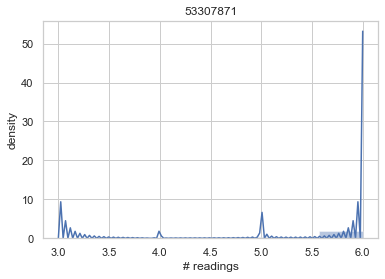

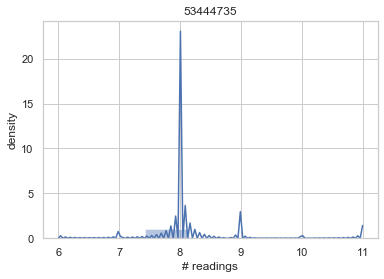

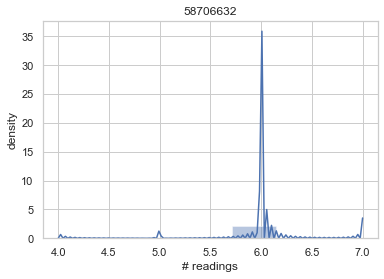

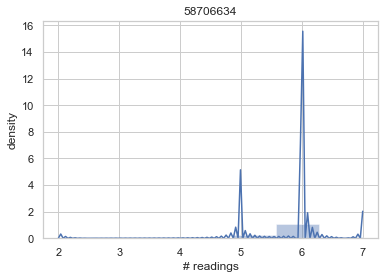

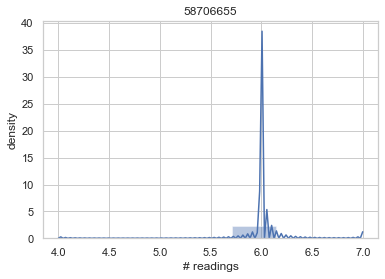

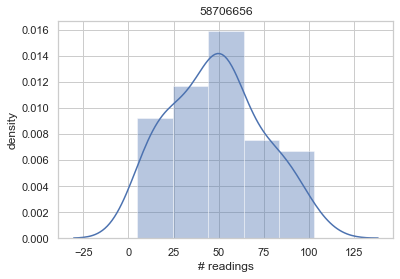

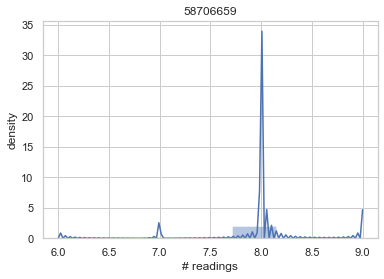

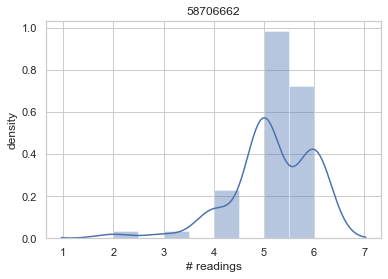

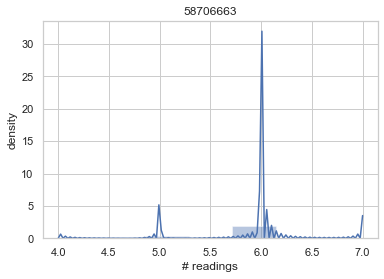

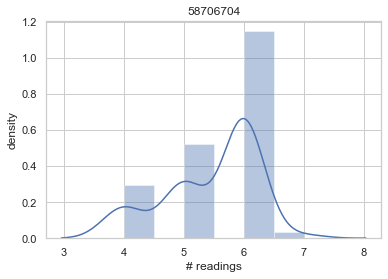

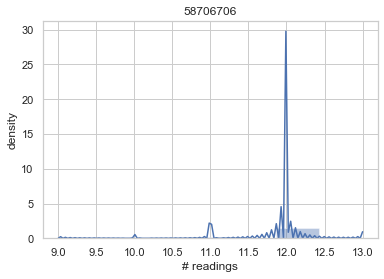

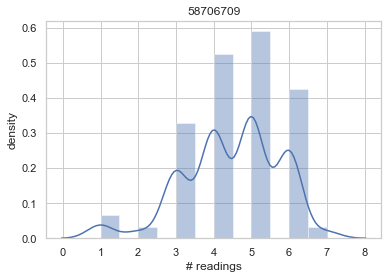

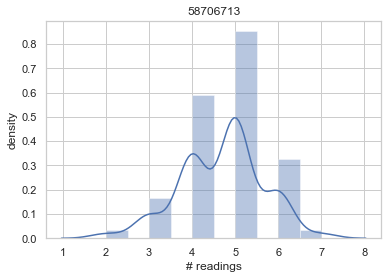

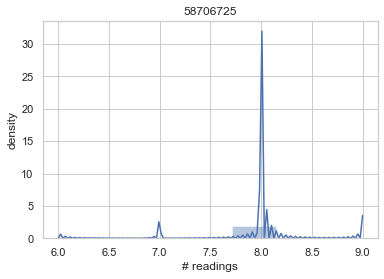

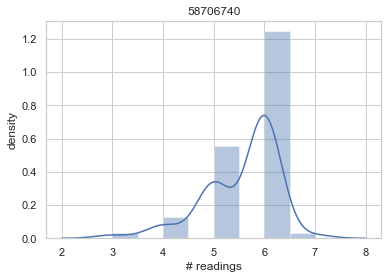

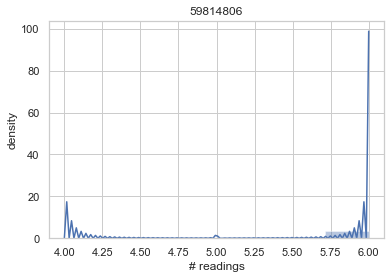

In [20]:
with PdfPages(dir_export +"Frequency number of readings barplot _ windows.pdf") as pdf:
    for n, g in df.groupby("medidor"):
        #g["fecha"] = pd.to_datetime(g["fecha"])
        g.set_index("fecha", inplace = True)
        g = g.resample("D").count()
        figure = plt.figure()
        ax = sns.distplot(g["voltajeA"]) #any columns will work
        ax.set(xlabel='# readings', ylabel='density', title = n)
        pdf.savefig(figure)

    

### Number of readings per each day of the data: LinePLot

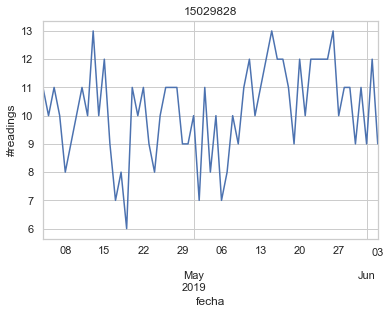

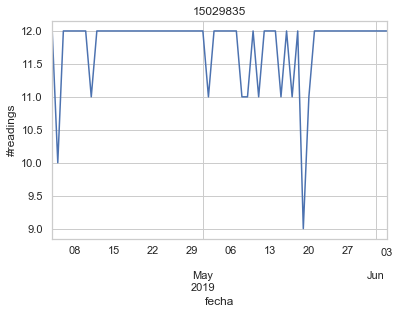

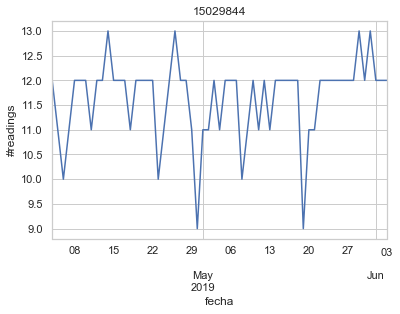

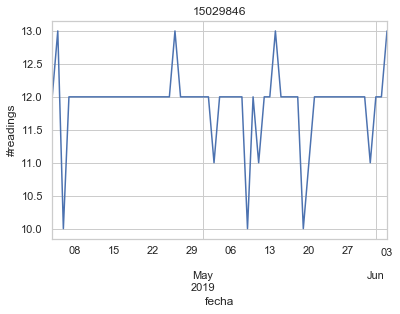

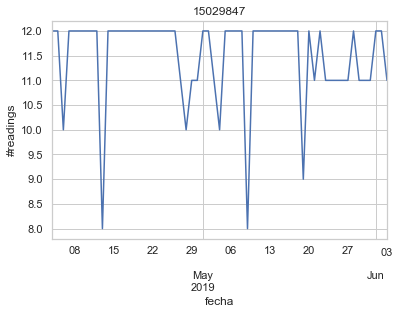

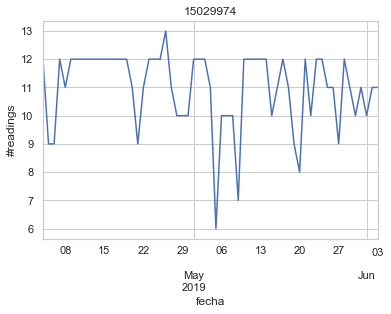

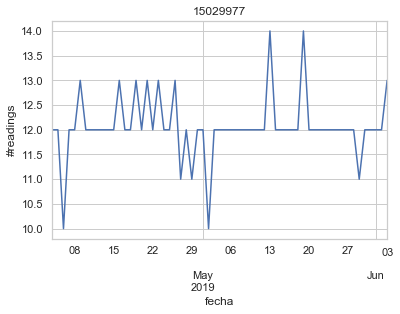

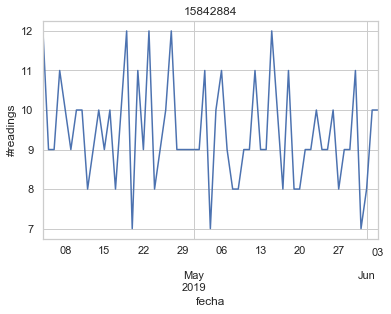

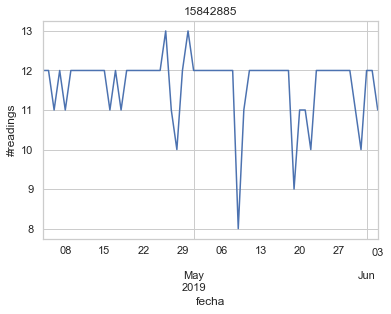

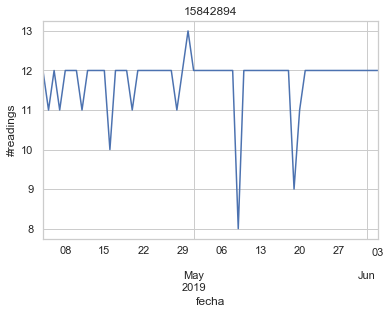

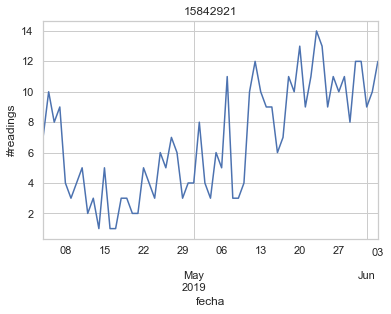

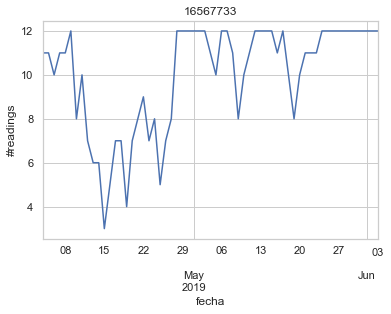

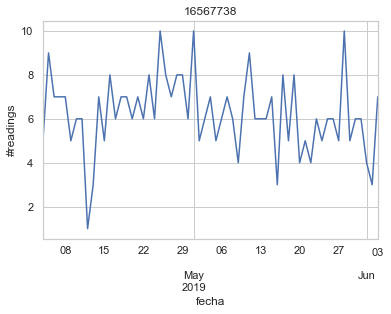

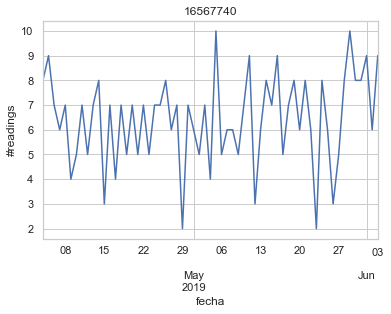

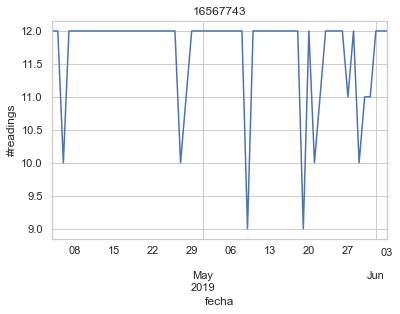

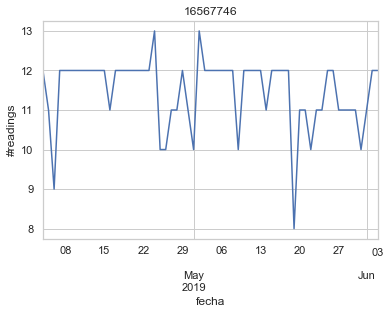

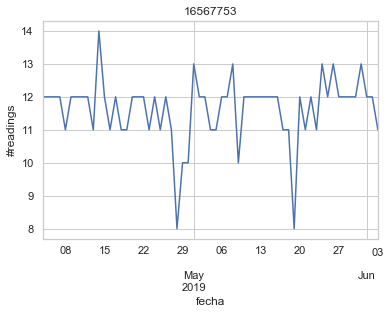

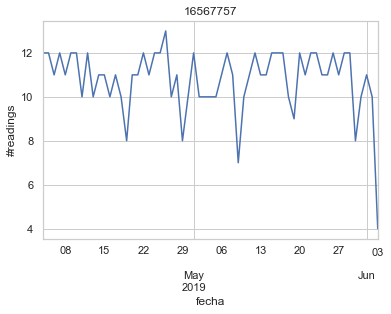

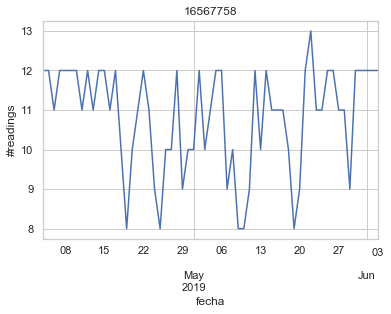

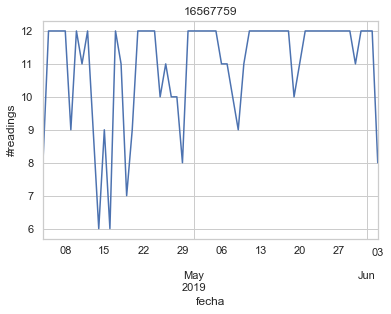

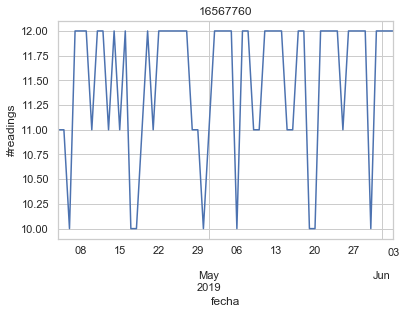

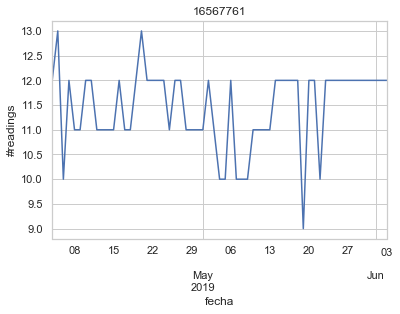

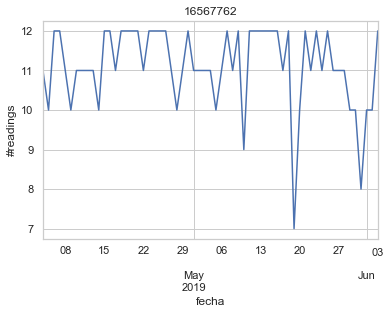

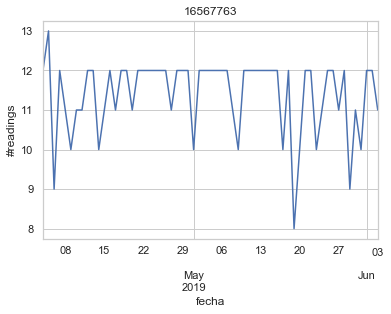

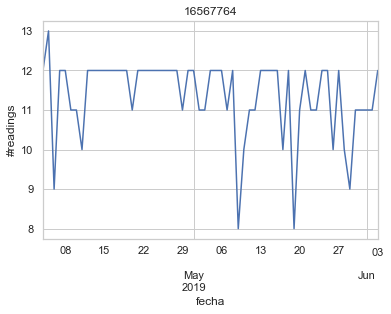

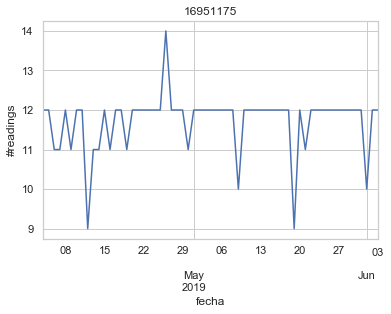

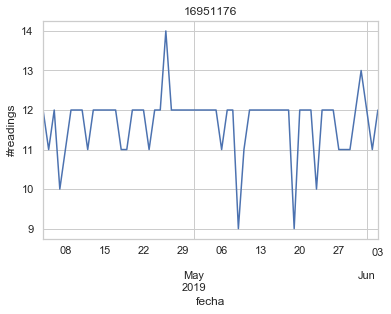

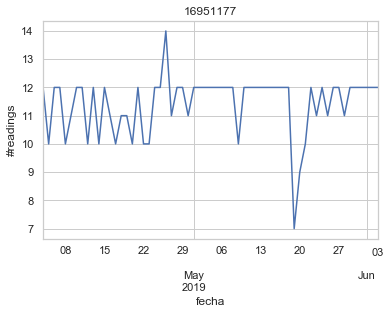

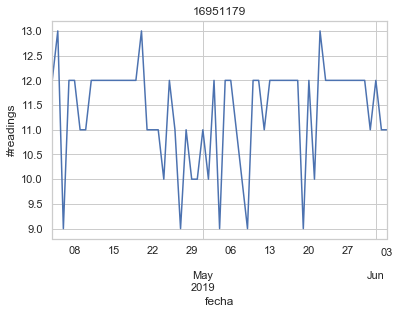

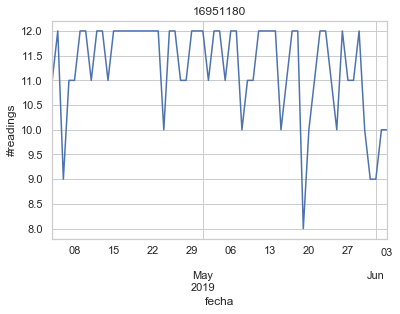

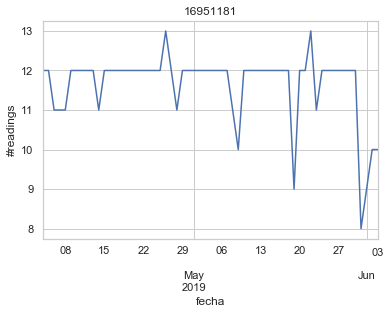

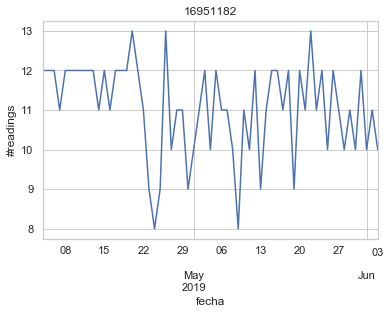

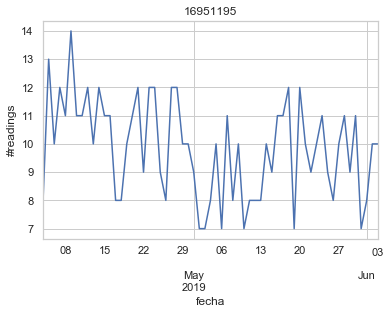

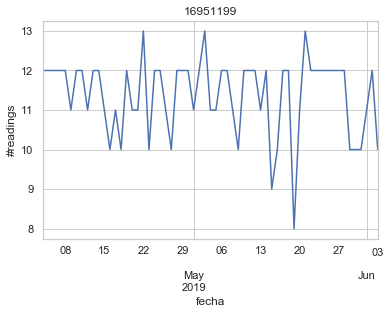

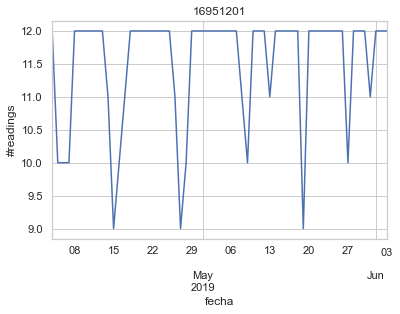

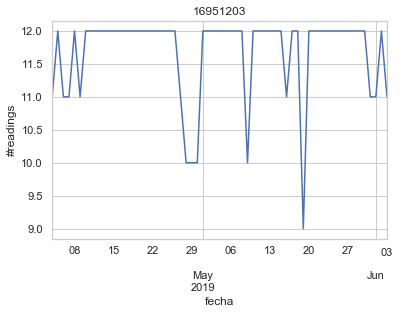

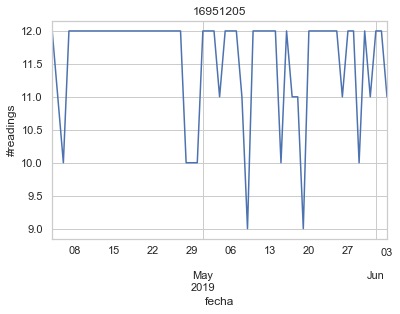

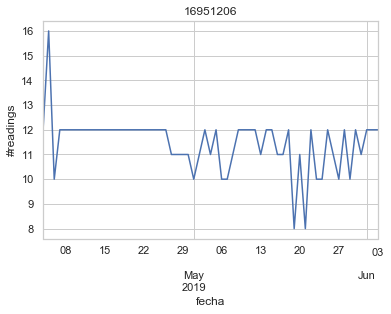

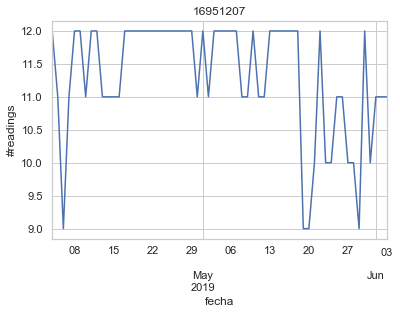

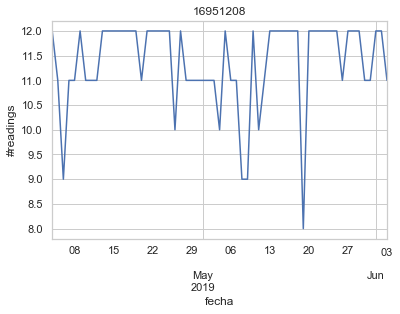

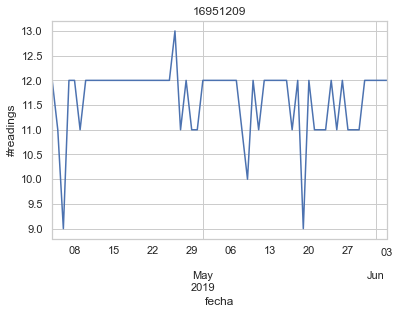

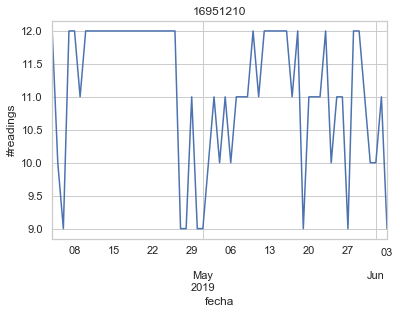

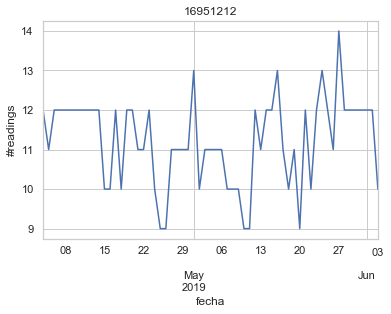

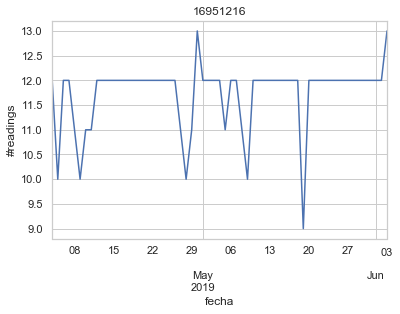

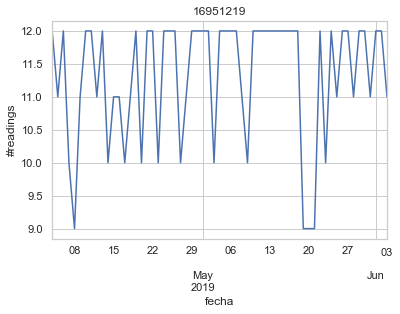

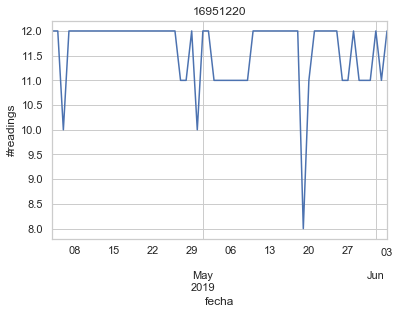

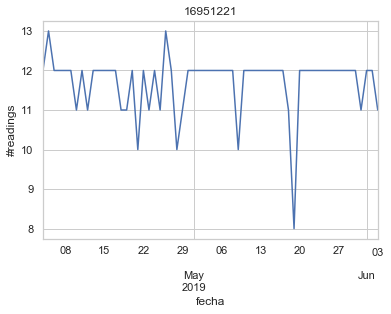

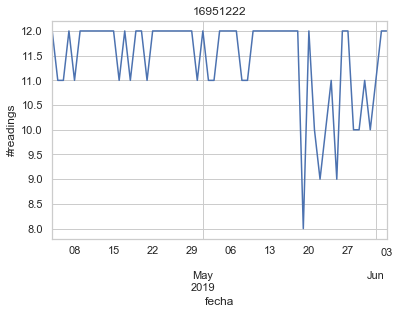

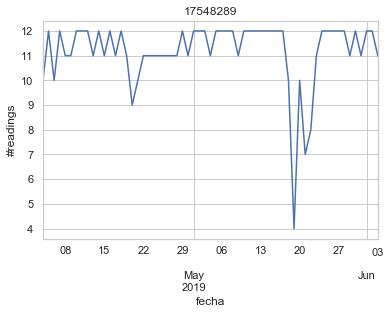

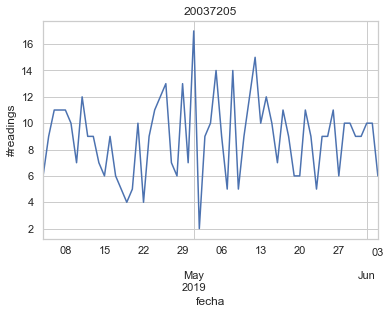

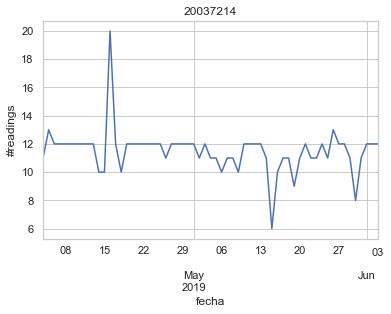

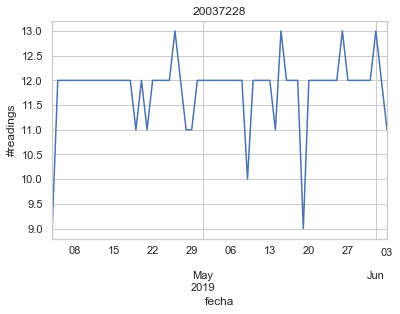

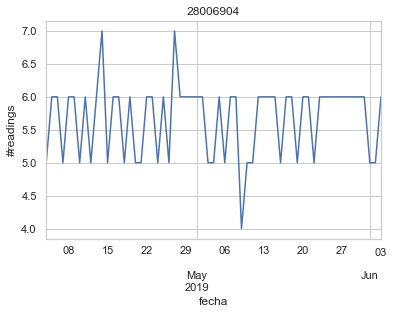

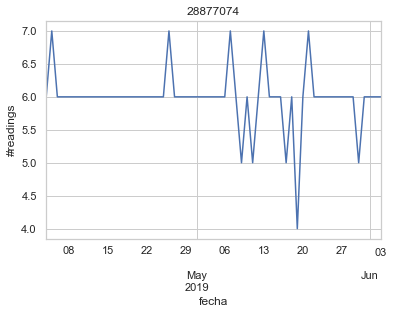

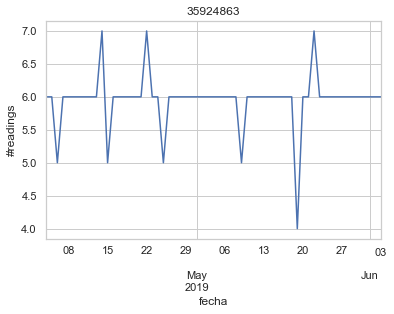

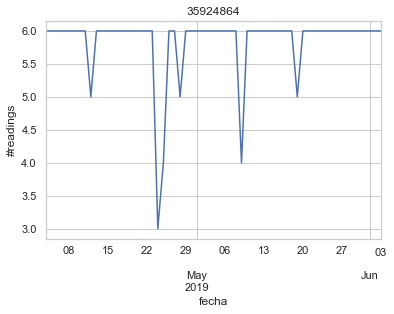

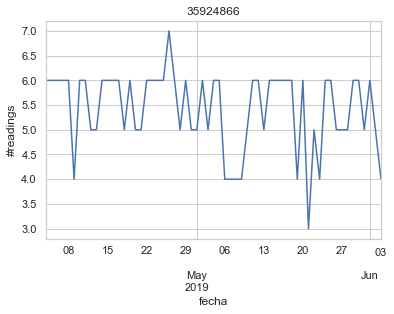

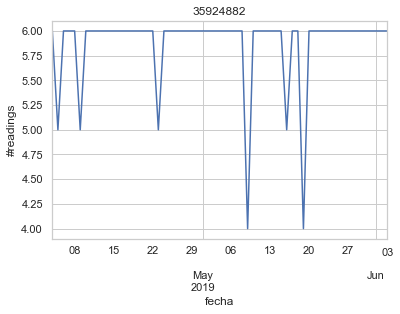

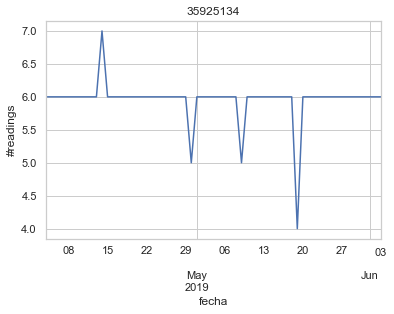

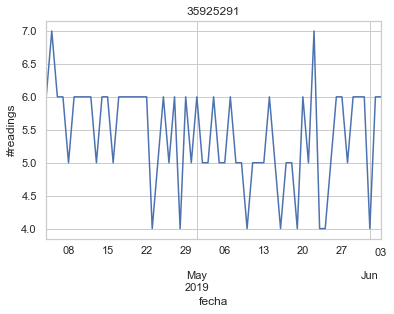

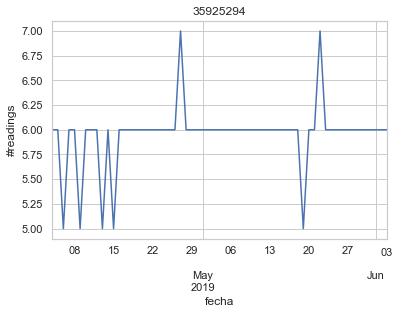

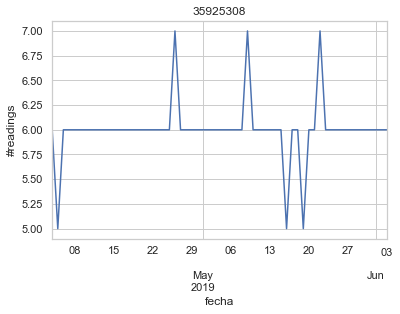

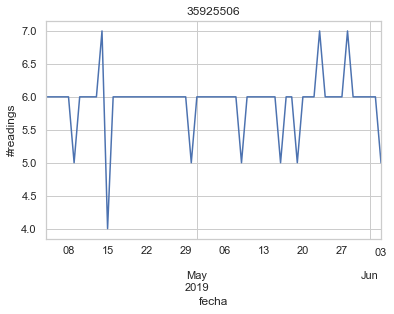

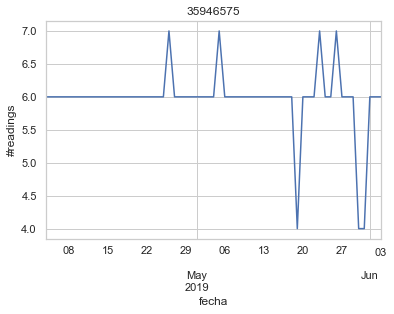

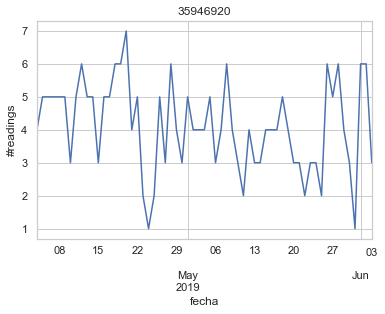

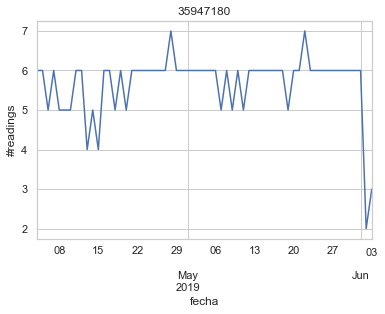

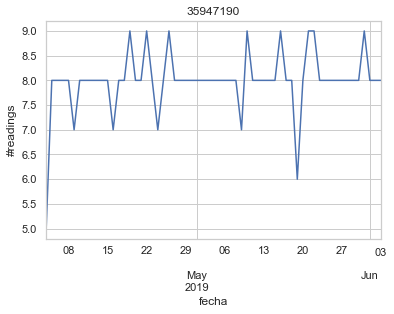

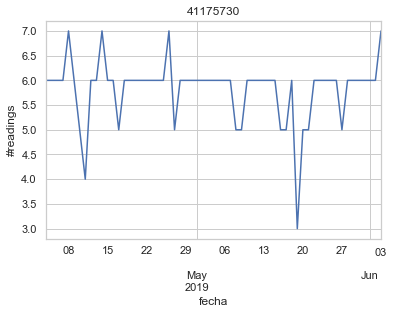

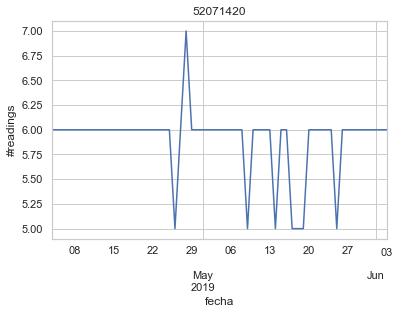

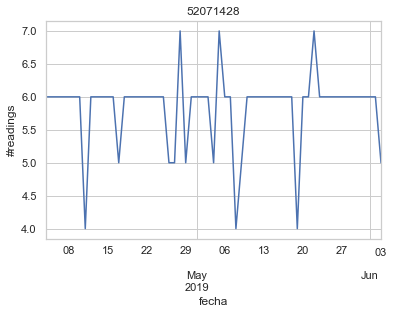

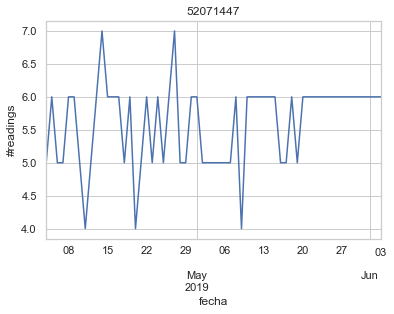

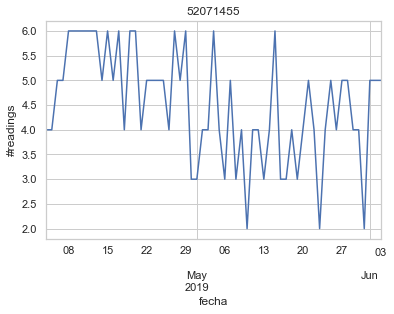

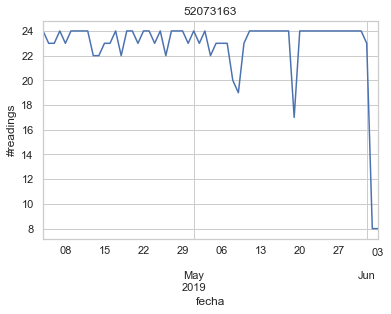

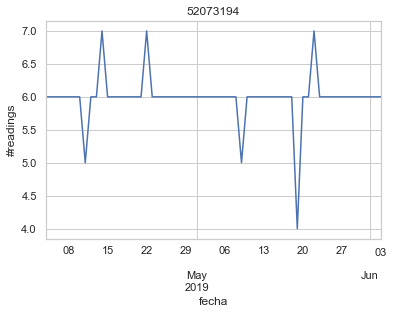

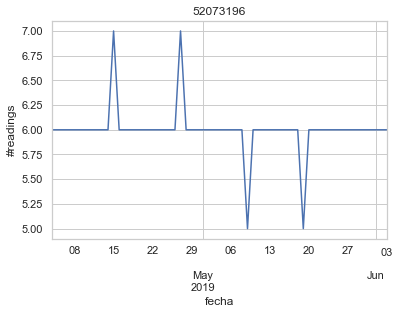

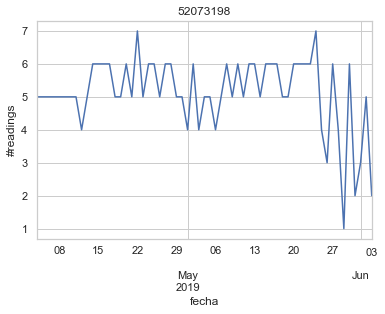

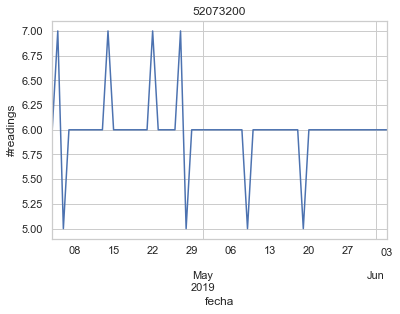

In [ ]:
with PdfPages(dir_export + "Number of readings per each day of the data LinePLot _windows.pdf") as pdf:
    for n, g in df.groupby("medidor"):
        #g["fecha"] = pd.to_datetime(g["fecha"])
        g.set_index("fecha", inplace = True)
        g = g.resample("D").count()
        figure = plt.figure()
        plt.title(n)
        plt.ylabel("#readings")
        plt.xlabel("days")
        g["voltajeA"].plot()
        pdf.savefig(figure)

    

### Number of readings per each day of the data: BarPLot

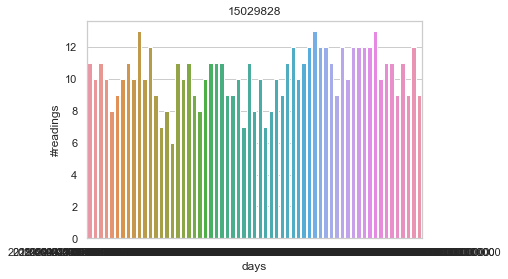

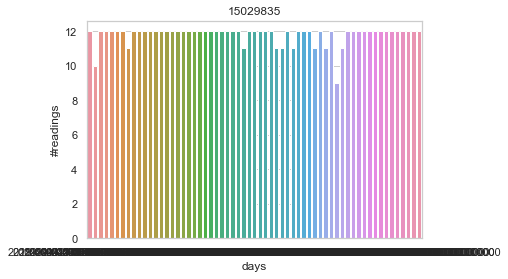

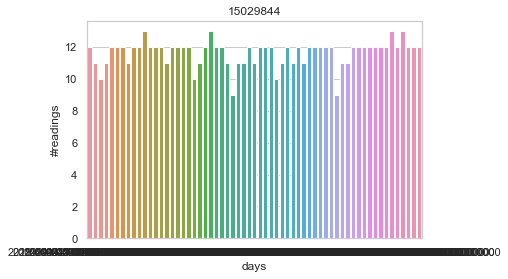

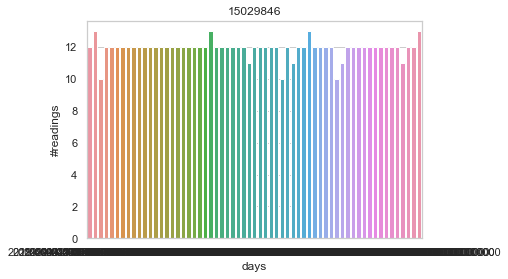

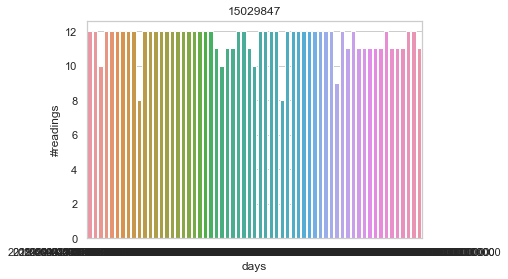

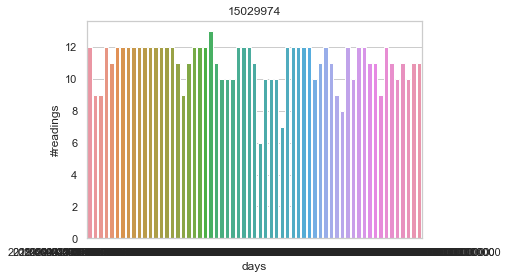

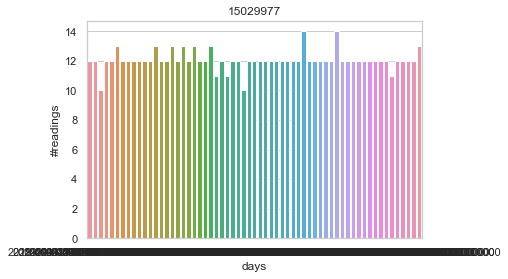

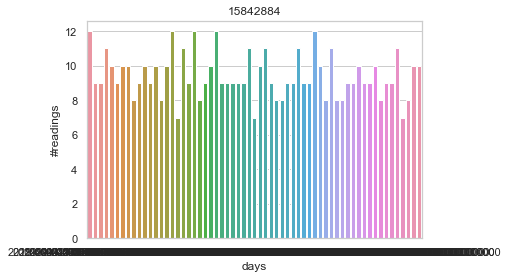

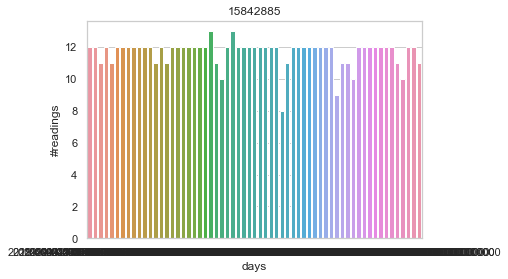

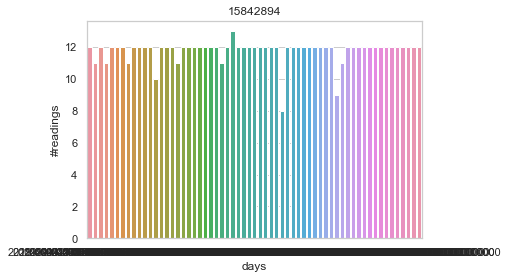

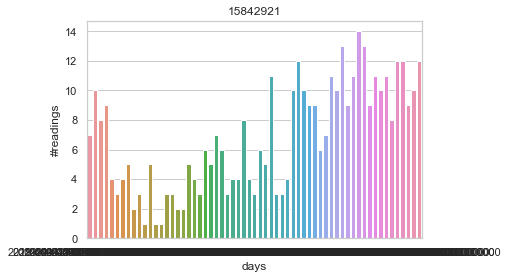

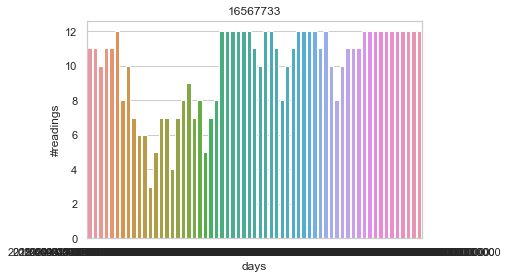

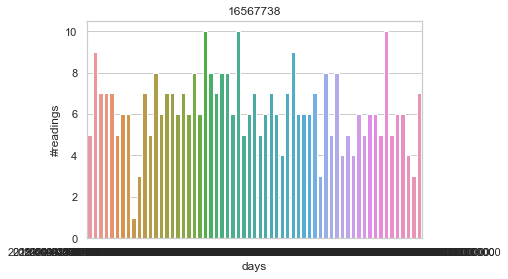

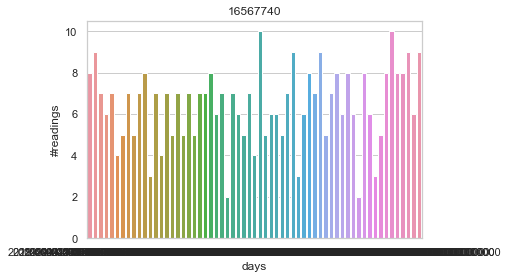

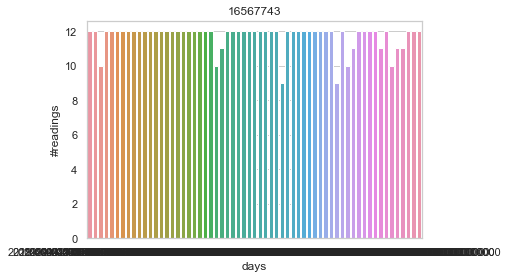

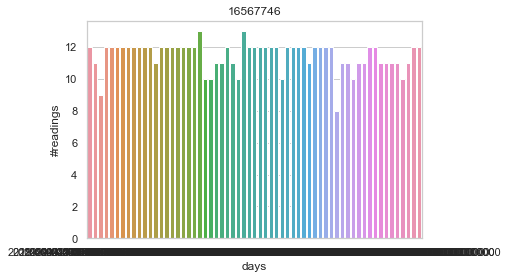

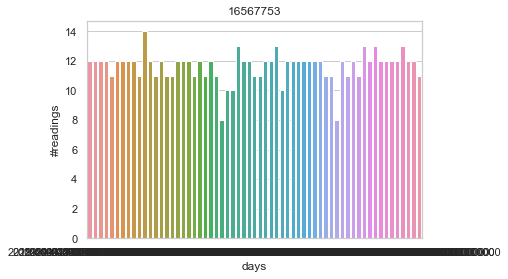

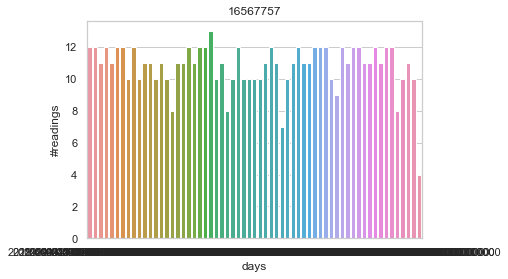

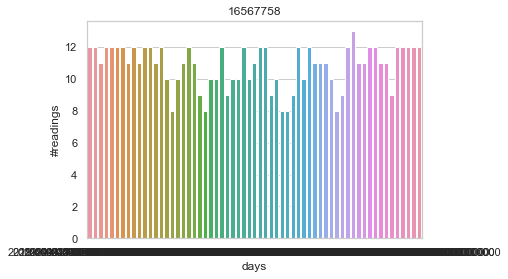

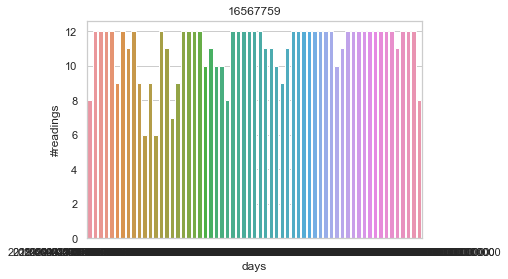

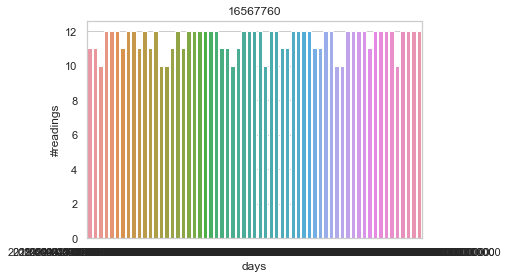

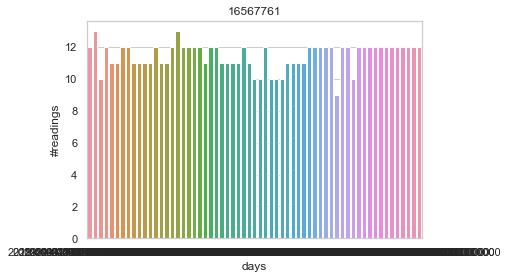

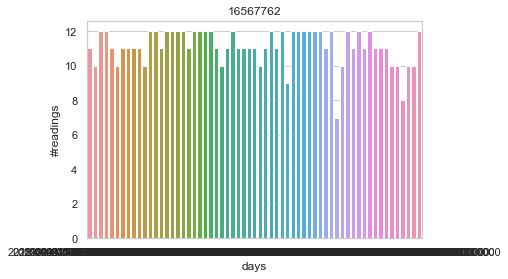

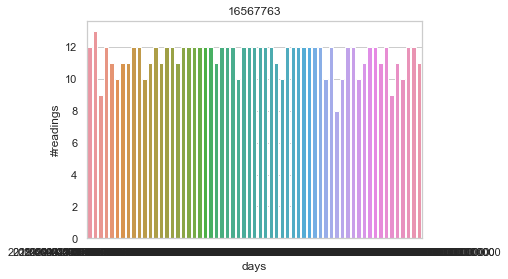

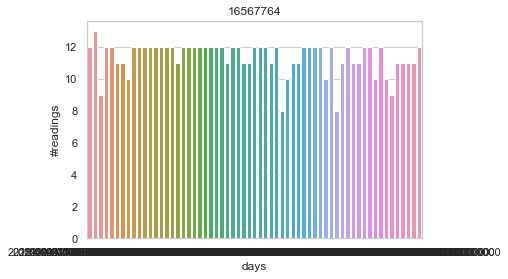

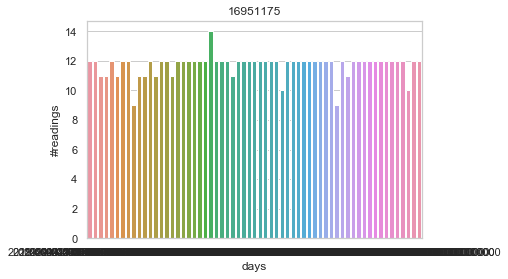

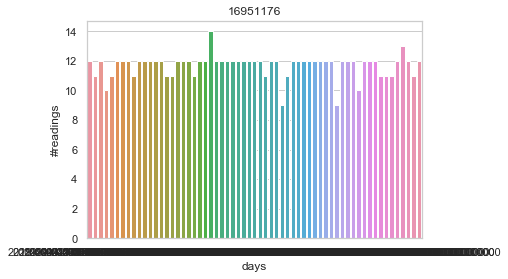

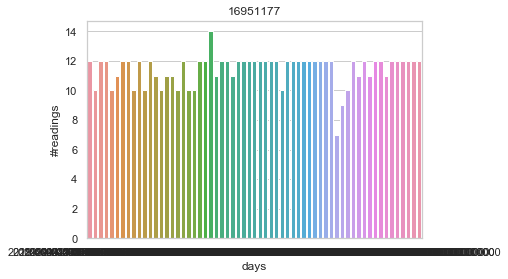

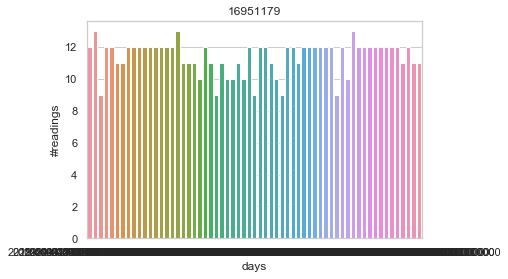

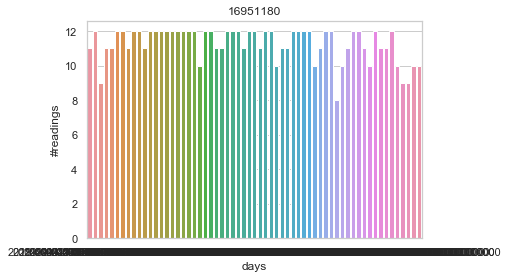

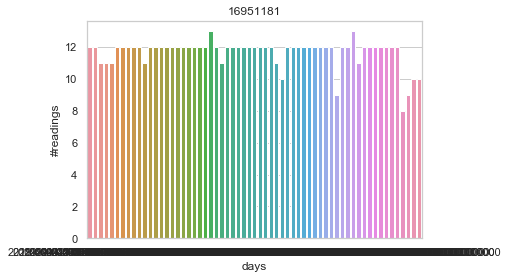

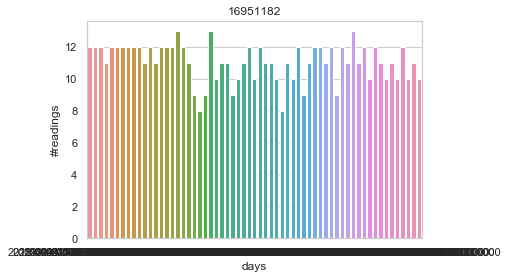

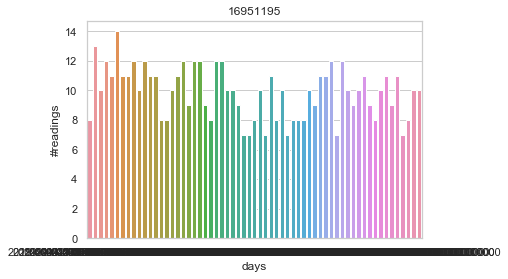

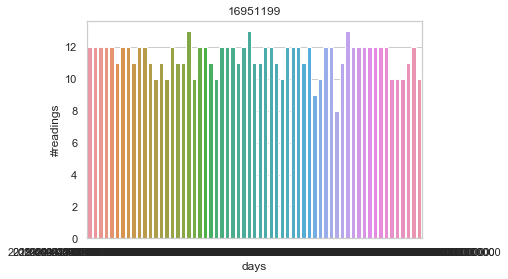

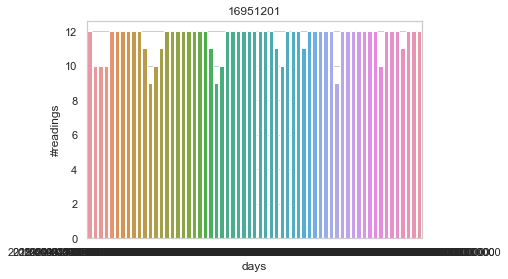

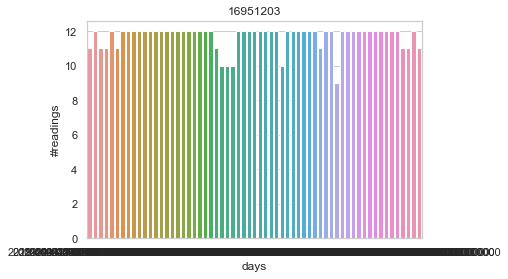

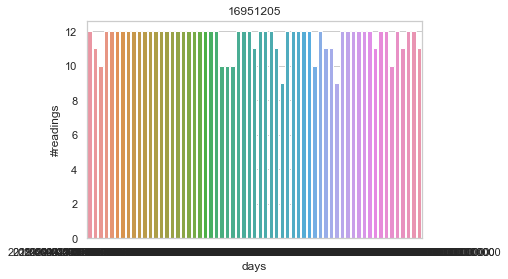

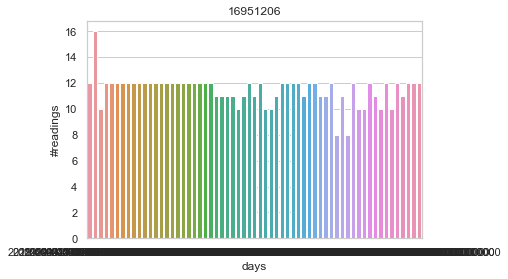

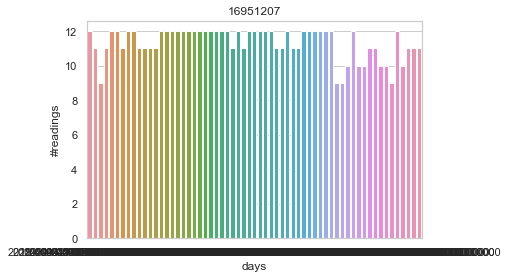

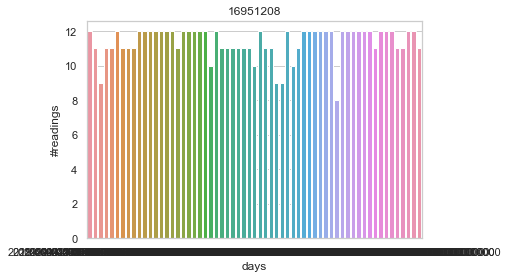

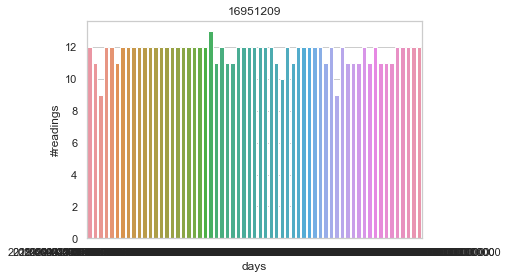

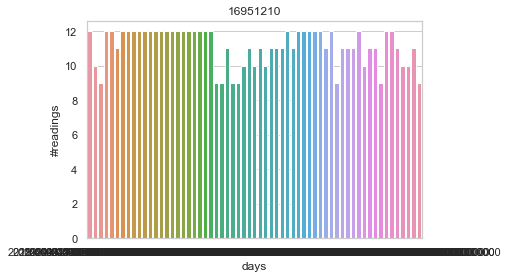

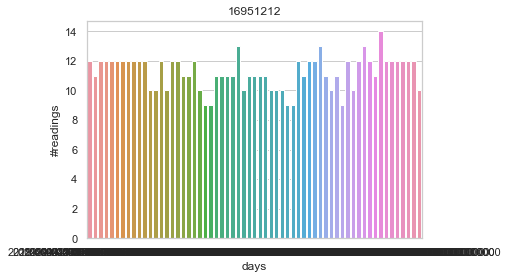

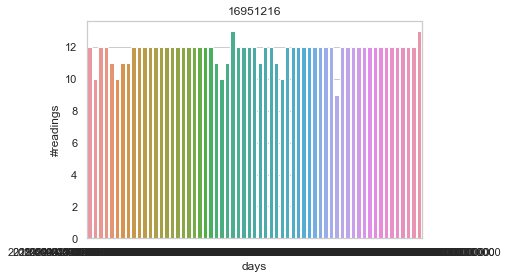

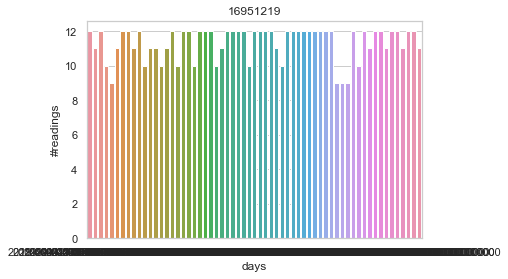

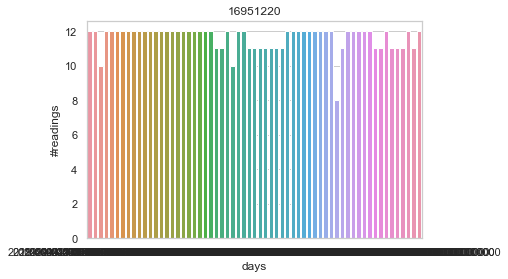

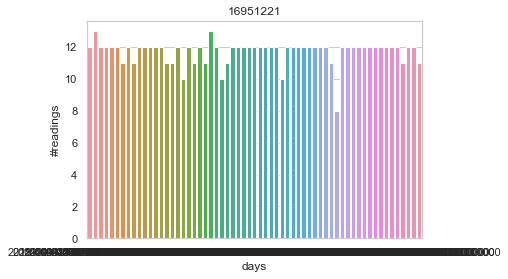

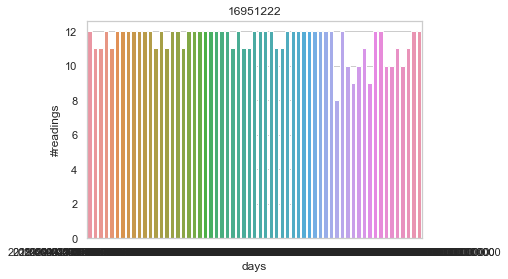

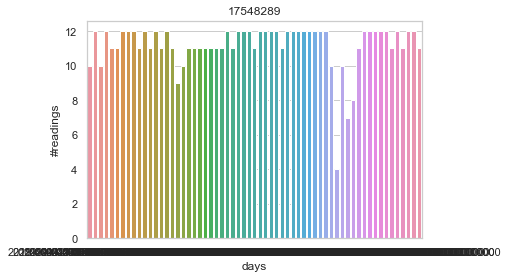

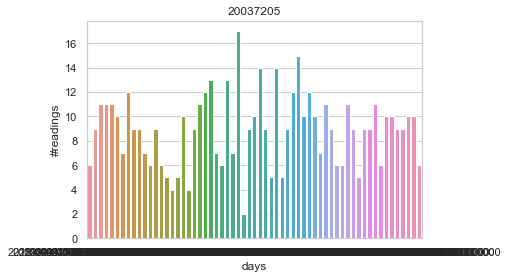

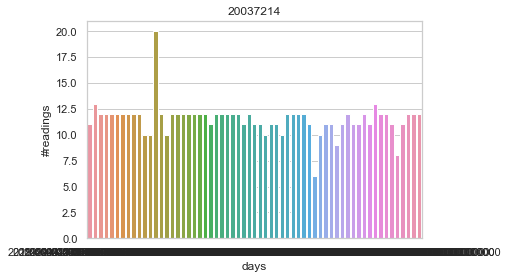

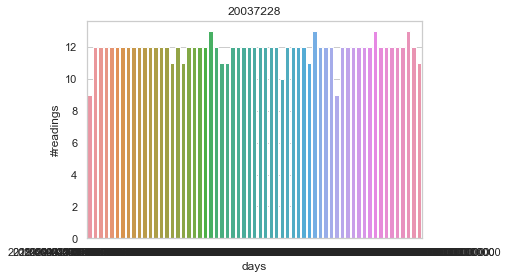

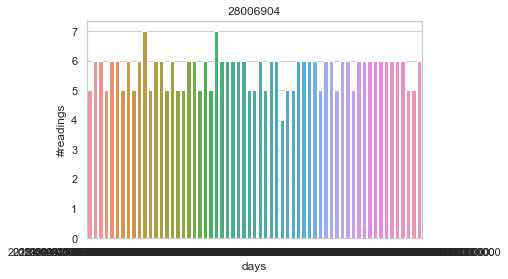

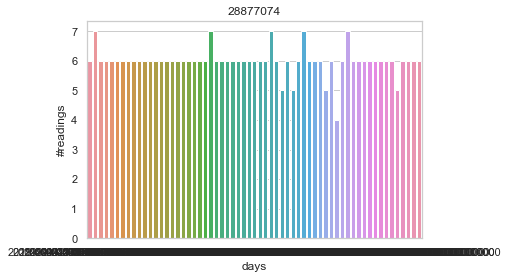

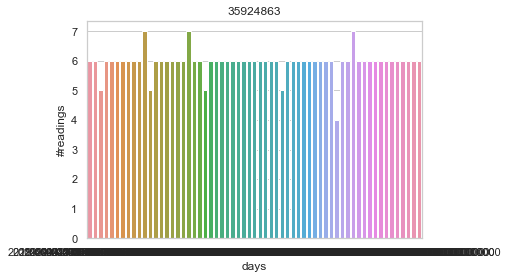

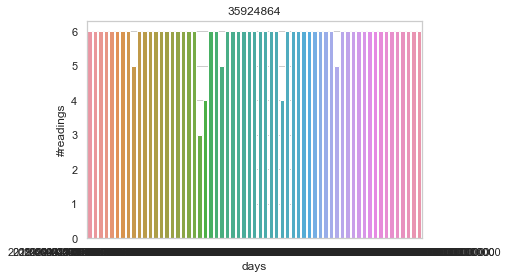

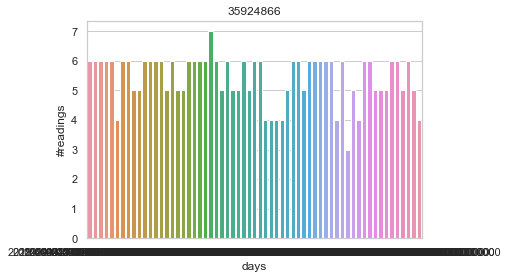

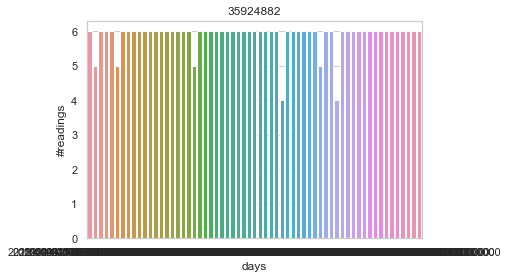

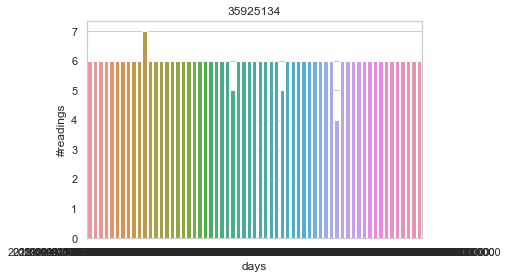

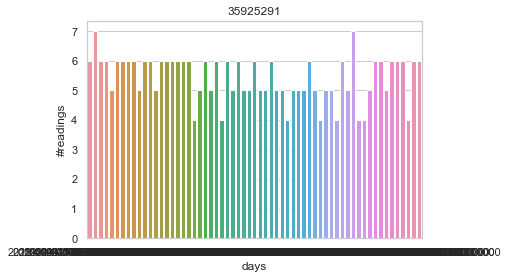

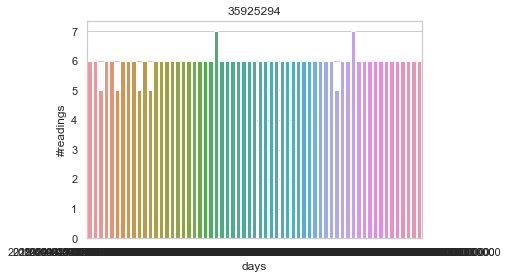

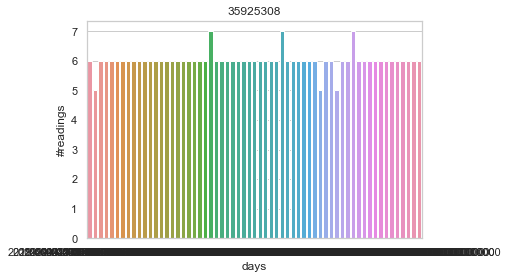

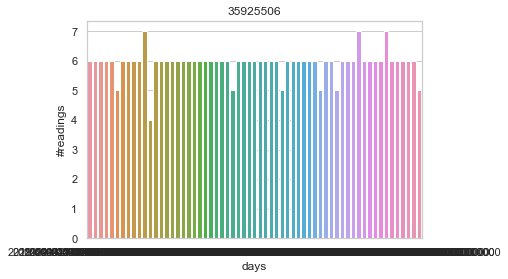

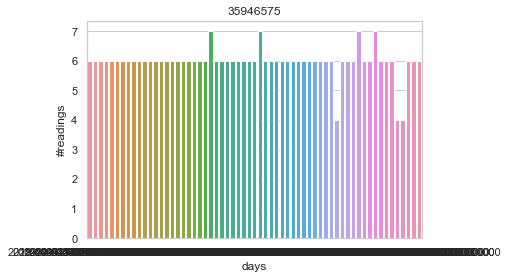

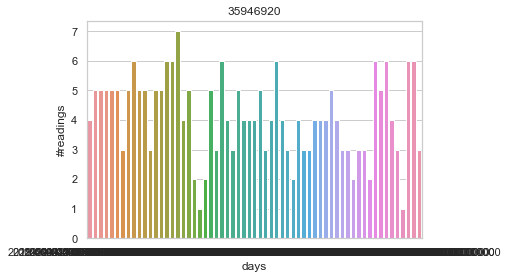

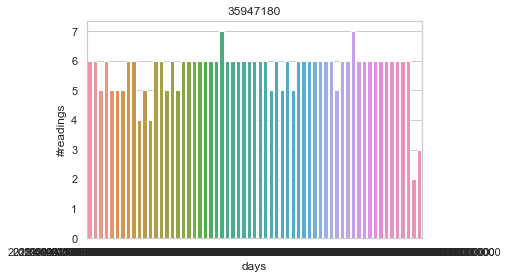

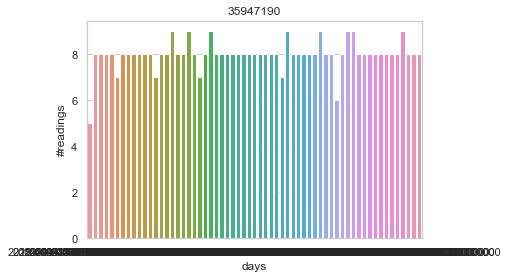

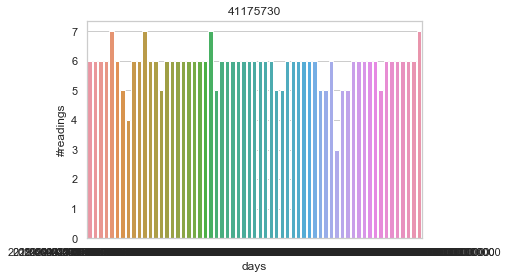

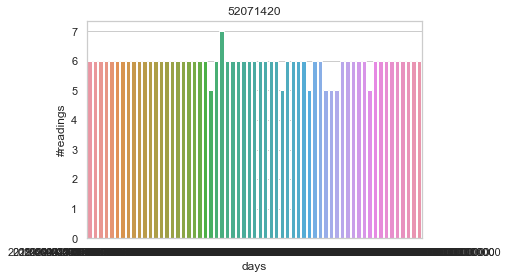

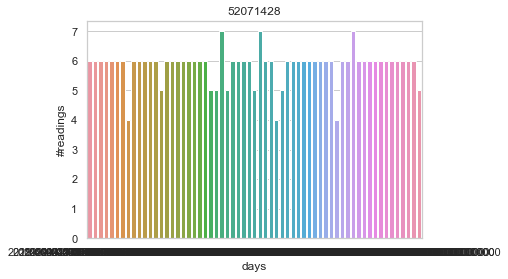

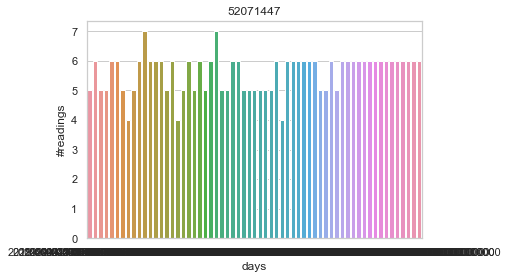

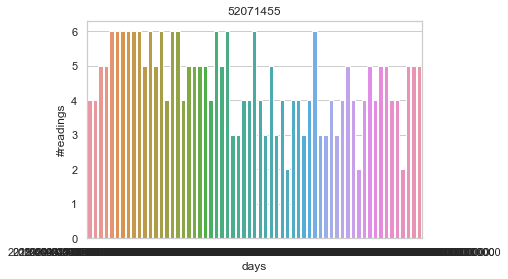

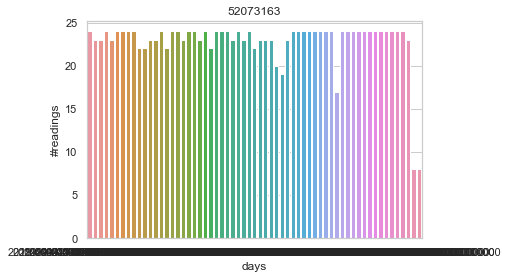

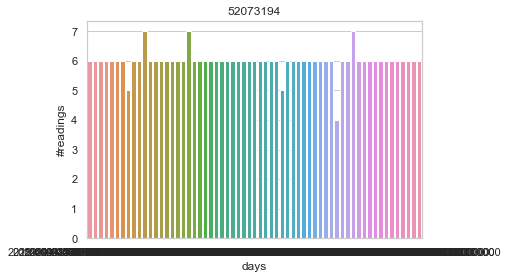

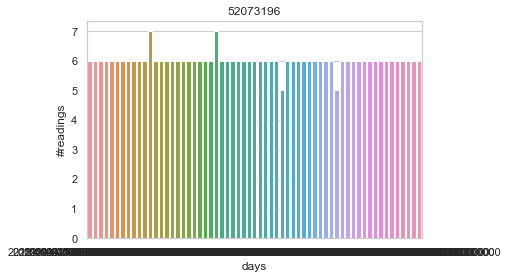

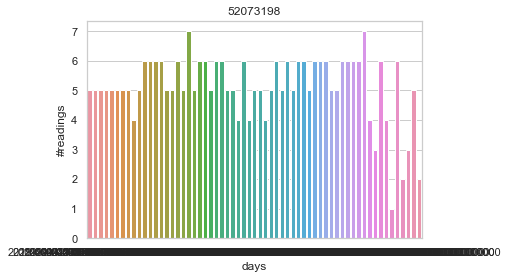

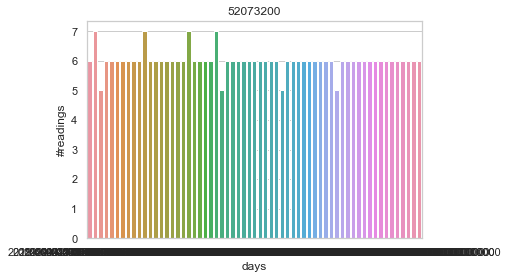

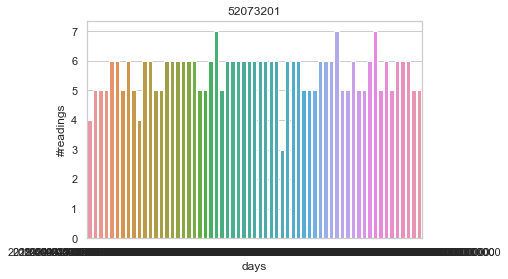

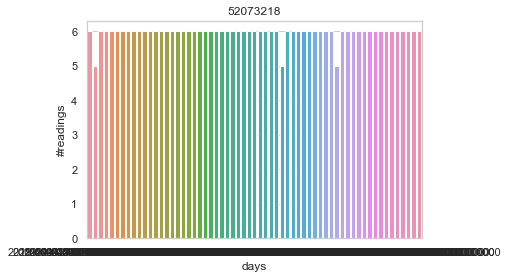

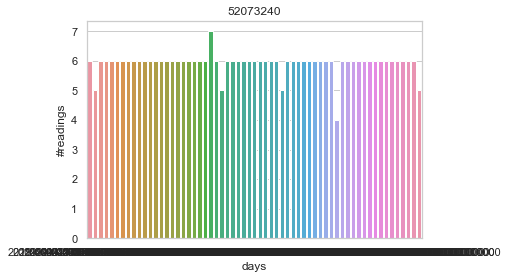

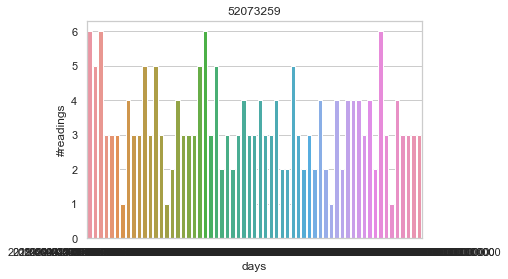

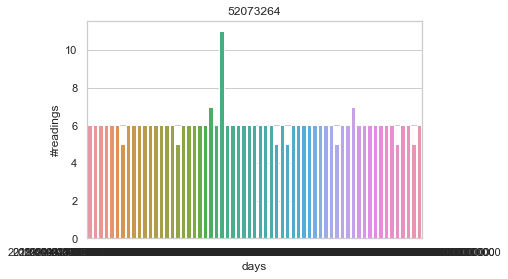

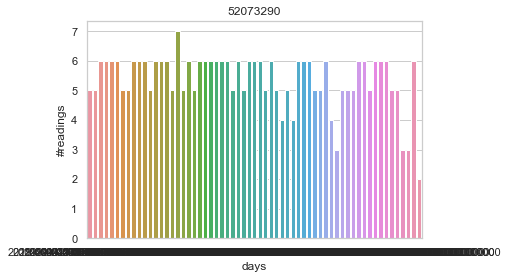

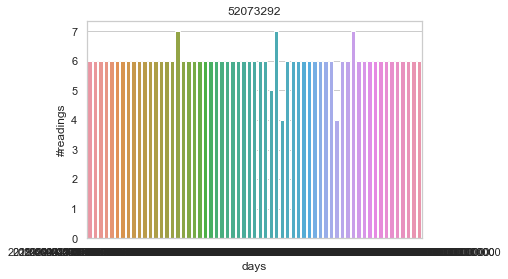

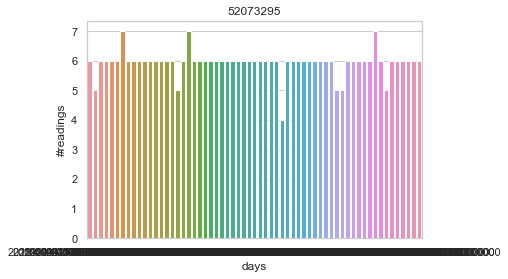

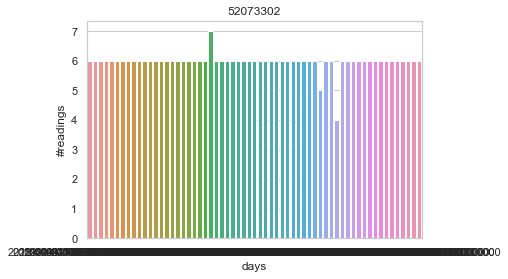

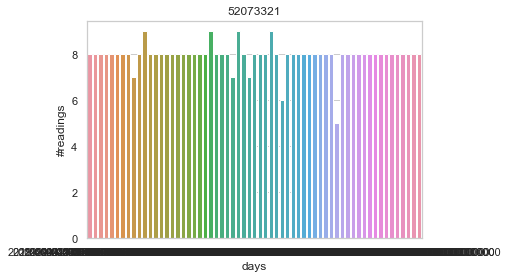

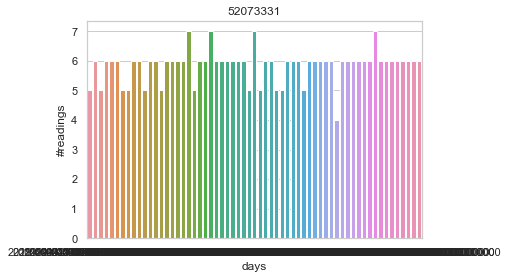

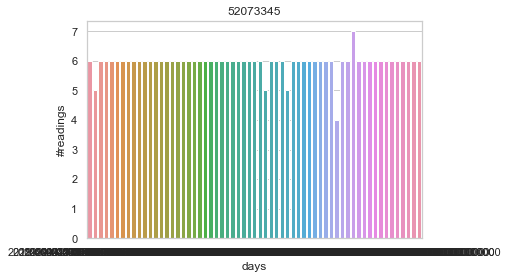

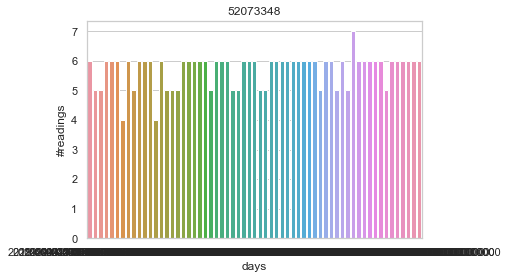

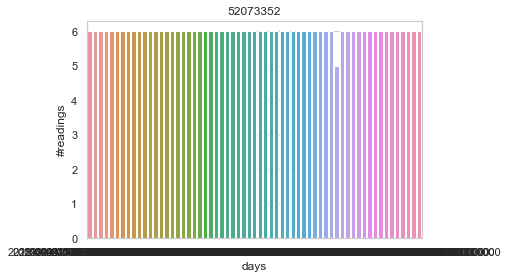

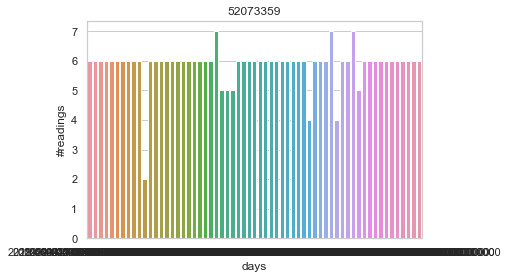

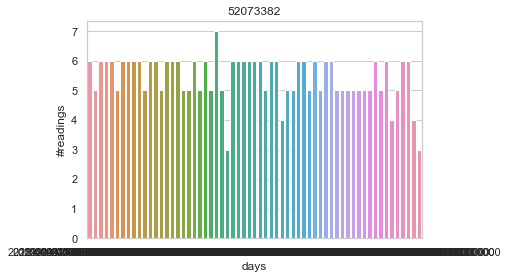

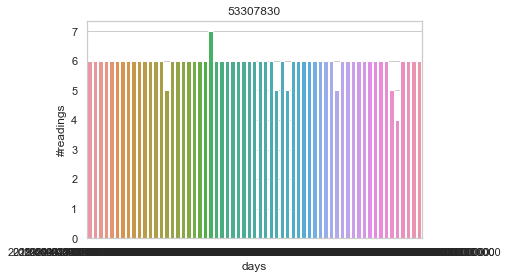

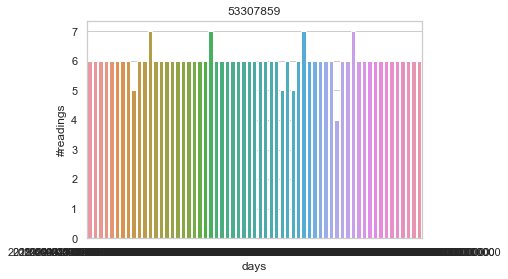

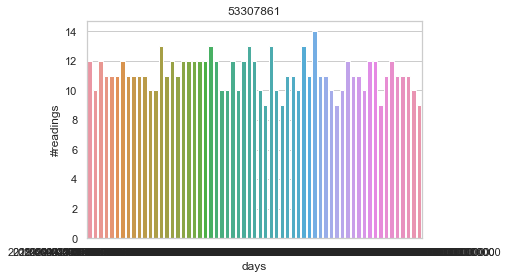

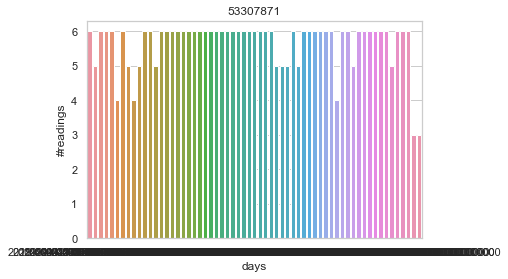

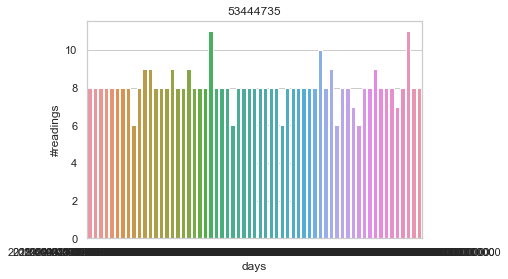

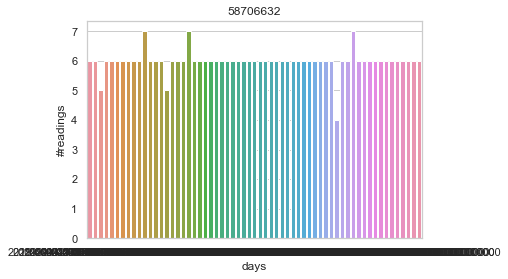

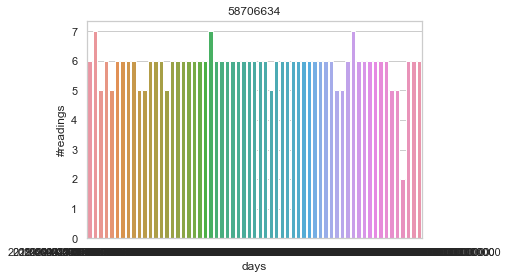

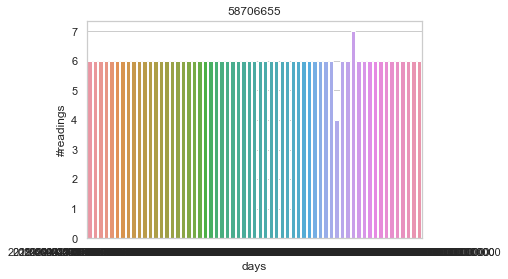

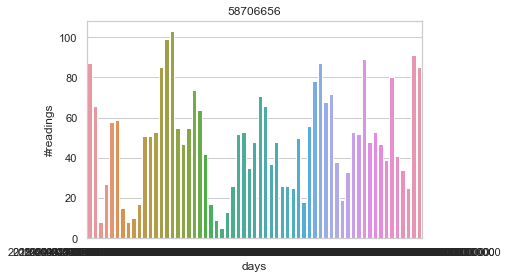

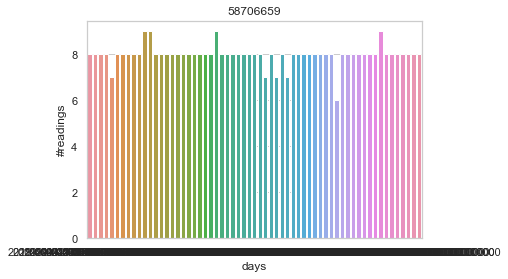

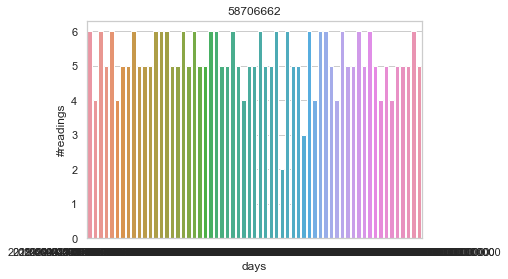

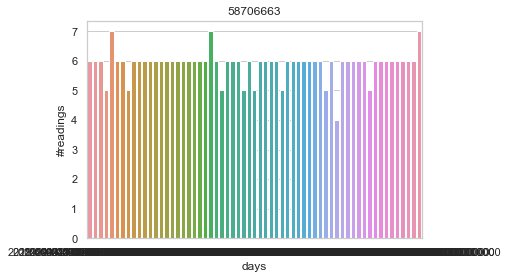

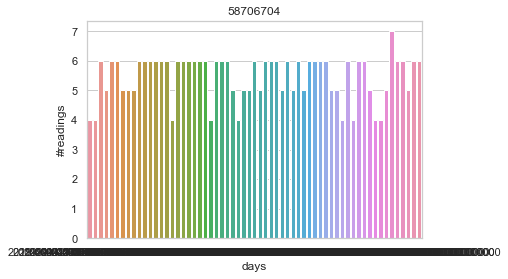

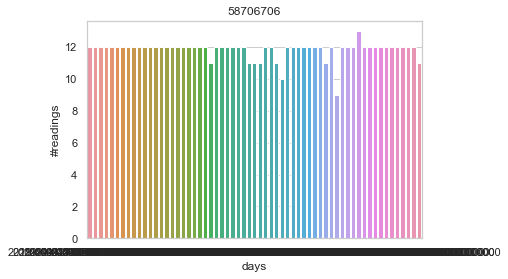

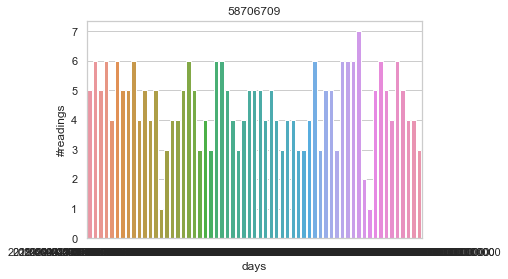

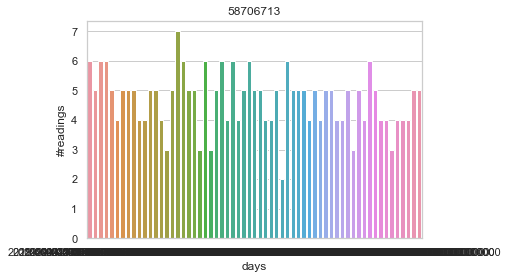

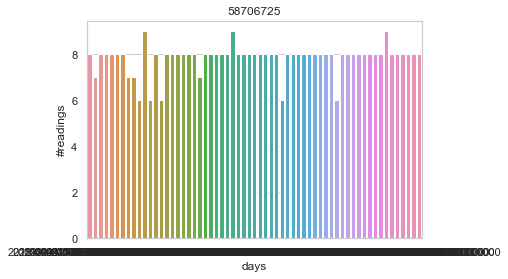

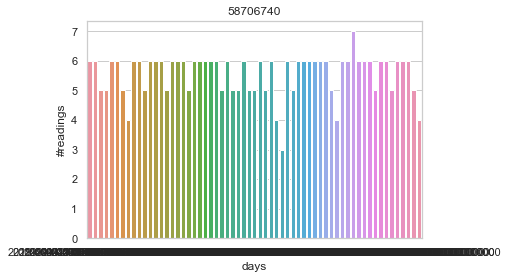

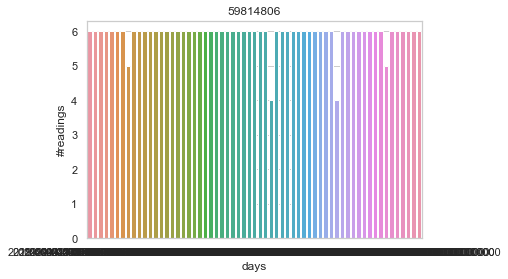

In [24]:
with PdfPages(dir_export + "Number of readings per each day of the data BarPLot _windows.pdf") as pdf:
    for n, g in df.groupby("medidor"):
        #g["fecha"] = pd.to_datetime(g["fecha"])
        g.set_index("fecha", inplace = True)
        g = g.resample("D").count()
        figure = plt.figure()
        ax = sns.barplot(x = g.index, y = "voltajeA", data =g)
        ax.set(xlabel='days', ylabel='#readings', title = n)
        pdf.savefig(figure)

    